In [127]:
# import pip
# pip.main(['install', '--upgrade', 'textblob'])

In [128]:
import pandas as pd
import numpy as np

from snownlp import SnowNLP

import jieba
import jieba.analyse
import jieba.posseg as pseg
import sys

from collections import Counter

from nltk.corpus import stopwords

import re

from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

from operator import itemgetter

import string
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib as mpl
 
from sklearn.manifold import MDS

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
plt.style.use('ggplot')
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['axes.titlesize'] = 16

# <bold><font size = 5>Read data

<font size=4> Some preprocessing need be done... 

In [129]:
jamData = pd.read_csv('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/ctjam_data.csv') 
jamData.loc[jamData['QuestionTitle'].map(lambda x: '巅峰' in str(x)), 'QuestionTitle'] = jamData.loc[jamData[
    'QuestionTitle'].map(lambda x: '巅峰' in str(x)), 'QuestionTitle'].map(lambda x: x.split('(')[0]) 
jamData.loc[jamData['QuestionTitle'].map(lambda x: 'Angile' in x), 'QuestionTitle'] = \
            jamData.loc[jamData['QuestionTitle'].map(lambda x: 'Angile' in x), 'QuestionTitle'].map(lambda x: x.replace(
            'Angile', 'Agile'))                                                                                                   
jamData.loc[jamData['QuestionTitle'].map(lambda x: 'openwisk' in x.lower()), 'QuestionTitle'] = \
            jamData.loc[jamData['QuestionTitle'].map(lambda x: 'openwisk' in x), 'QuestionTitle'].map(lambda x: x.replace(
            'openwisk', 'opennwhisk'))
jamData['QuestionTitle'] = jamData['QuestionTitle'].map(lambda x: str(x))
jamData['QuesText'] = jamData['QuestionTitle'].map(lambda x: SnowNLP(x))
jamData['QuesSimText'] = jamData['QuesText'].map(lambda x: x.han)
jamData

,QuestionID,QuestionTitle,QuestionCreatedTime,AnswerID,AnswerText,AnswerCreateTime,Attr 1,Attr 2,Attr 3,Attr7,Attr 4,Attr 5,Attr 6,Position Title,QuesText,QuesSimText
0,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a1b6d9ed02fd4253850df574e1e6c9eb,Yes,2017-08-17 09:57,7,c,1,S0,a1,1,C0,Software Developer,<snownlp.SnowNLP object at 0x148970c50>,Do you like our new Agile Open Office?
1,1718f85eac0d416c99340c2688c31d5b,"David Kenny在上午的TownHall上说""Powerpoint is neithe...",2017-08-31 08:52,c2b9bcd7236b4714afa786e35736c52c,不能把所有问题都丢到公司来解决,2017-08-31 06:50,9,c,1,S0,a1,1,C3,Software Developer,<snownlp.SnowNLP object at 0x148970a90>,"David Kenny在上午的TownHall上说""Powerpoint is neithe..."
2,b4b8c86e3727481198a19ee5308d1e81,如何才能在Lab工作的每一天都有好心情,2017-08-14 14:21,bfe1c5746a5e499cb18a787c47beb44e,"Have a harmonious, interesting and lovely team~",2017-08-16 06:37,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970dd8>,如何才能在Lab工作的每一天都有好心情
3,688bb4156caf46c8ad6c09a2eabd7ac4,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...,2017-08-17 14:39,62b74a06d35e4a01b718809896f16834,有更好的处理工作和人际关系的能力，和不同的人一起做不同的事，在不同的方面都有所改变。突破自己...,2017-08-22 02:09,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970e48>,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...
4,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,16a769618f5545828bfde7fada4e9f9a,把握市场需求,2017-08-24 12:01,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970eb8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？
5,8963f92c65f449b291390817479d578d,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...,2017-08-24 16:33,ac919395d5e4415497c7bda554021bf8,把握时机，理解市场，抓住用户心理的人，岗位不限,2017-08-24 12:00,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970f60>,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...
6,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,6a9b64e6b10b4582afc9b2d9925dee6f,喜欢,2017-08-21 01:39,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970fd0>,Do you like our new Agile Open Office?
7,8d57d41da3c6454fb3a767e1bee55b12,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",2017-08-21 19:21,f4dbdf2426564f01850e6d14adf06ee4,做好自己的工作,2017-08-22 03:17,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970358>,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？"
8,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a807458a36874144887085ae24a9cef1,like very much,2017-08-18 03:50,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970438>,Do you like our new Agile Open Office?
9,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,d97d76aba81844aab382f1c6a31238a5,技术。如果技术不领先，谈何满足客户需求。技术足够领先的情况下，甚至可以创造客户需求。,2017-08-24 09:20,11,b,1,S0,a1,1,C3,Information Architect,<snownlp.SnowNLP object at 0x1489704a8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？


In [130]:
jamData.loc[jamData['QuesSimText'].map(lambda x: '先客观地问自己，我对目前整体的团队氛围满意吗？' in x), \
            'QuesSimText'] = '先客观地问自己，我对目前整体的团队氛围满意吗？'

In [131]:
# How many answers get by each question
jamAnsCnt = jamData.groupby('QuestionTitle')['AnswerText'].count().rename('Answer_count').reset_index()
jamAnsCnt = jamAnsCnt.sort_values('Answer_count', ascending = False).reset_index(drop = True)
jamAnsCnt.head(10)

,QuestionTitle,Answer_count
0,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,51
1,Do you like our new Agile Open Office?,40
2,工程師的日常生活裡，你覺得甚麼最需要去改變？(e.g. 工作態度，社交活動，生活習慣，創新思...,38
3,除了项目以外， 你一周学习新技术的时间有多少？比如：一周1个小时，一周4个小时，一周10个小...,30
4,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",26
5,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,25
6,你希望工作环境发生的一个小改变是什么？,22
7,说到工程师文化，你想到的前三个词是什么？例如： 自由，效率，平等，尊重，信任，创新，简化流程...,16
8,你最喜欢的Whitewater工具是什么？,16
9,你觉得IBM是技术导向的么？,14


# <bold><font size = 5>Question clustering statistical analysis

<font size=4>1. Read clustering results

In [132]:
QuesCluster = pd.read_csv('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/QuesCluster_2.csv', usecols = ['QuesSimText', 'cluster', 'topic', 'words'])
QuesCluster.loc[QuesCluster['topic'] == 'company manage', 'topic'] = 'company management'
jamData = jamData.merge(QuesCluster, on = 'QuesSimText', how = 'left')
jamData.head(10)

,QuestionID,QuestionTitle,QuestionCreatedTime,AnswerID,AnswerText,AnswerCreateTime,Attr 1,Attr 2,Attr 3,Attr7,Attr 4,Attr 5,Attr 6,Position Title,QuesText,QuesSimText,cluster,words,topic
0,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a1b6d9ed02fd4253850df574e1e6c9eb,Yes,2017-08-17 09:57,7,c,1,S0,a1,1,C0,Software Developer,<snownlp.SnowNLP object at 0x148970c50>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile
1,1718f85eac0d416c99340c2688c31d5b,"David Kenny在上午的TownHall上说""Powerpoint is neithe...",2017-08-31 08:52,c2b9bcd7236b4714afa786e35736c52c,不能把所有问题都丢到公司来解决,2017-08-31 06:50,9,c,1,S0,a1,1,C3,Software Developer,<snownlp.SnowNLP object at 0x148970a90>,"David Kenny在上午的TownHall上说""Powerpoint is neithe...",12.0,(),others
2,b4b8c86e3727481198a19ee5308d1e81,如何才能在Lab工作的每一天都有好心情,2017-08-14 14:21,bfe1c5746a5e499cb18a787c47beb44e,"Have a harmonious, interesting and lovely team~",2017-08-16 06:37,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970dd8>,如何才能在Lab工作的每一天都有好心情,0.0,"('工作',)",work
3,688bb4156caf46c8ad6c09a2eabd7ac4,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...,2017-08-17 14:39,62b74a06d35e4a01b718809896f16834,有更好的处理工作和人际关系的能力，和不同的人一起做不同的事，在不同的方面都有所改变。突破自己...,2017-08-22 02:09,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970e48>,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...,11.0,"('工作', '管理', '转型', '知识', '方式', '转变')",transformation
4,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,16a769618f5545828bfde7fada4e9f9a,把握市场需求,2017-08-24 12:01,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970eb8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,11.0,"('技术', '转型', '重要', 'ibm', '成功')",transformation
5,8963f92c65f449b291390817479d578d,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...,2017-08-24 16:33,ac919395d5e4415497c7bda554021bf8,把握时机，理解市场，抓住用户心理的人，岗位不限,2017-08-24 12:00,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970f60>,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...,4.0,"('项目', '技术', '开发', '产品', '成功', '测试')",project
6,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,6a9b64e6b10b4582afc9b2d9925dee6f,喜欢,2017-08-21 01:39,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970fd0>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile
7,8d57d41da3c6454fb3a767e1bee55b12,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",2017-08-21 19:21,f4dbdf2426564f01850e6d14adf06ee4,做好自己的工作,2017-08-22 03:17,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970358>,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",3.0,"('ibm',)",IBM
8,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a807458a36874144887085ae24a9cef1,like very much,2017-08-18 03:50,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970438>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile
9,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,d97d76aba81844aab382f1c6a31238a5,技术。如果技术不领先，谈何满足客户需求。技术足够领先的情况下，甚至可以创造客户需求。,2017-08-24 09:20,11,b,1,S0,a1,1,C3,Information Architect,<snownlp.SnowNLP object at 0x1489704a8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,11.0,"('技术', '转型', '重要', 'ibm', '成功')",transformation


In [133]:
jamData.shape

(570, 19)

In [134]:
QuesCluster[['cluster', 'topic']].drop_duplicates().to_csv('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/QuesCluster.csv', index = False)

In [135]:
# Something wrong need correction
jamData.loc[(jamData['cluster'] == 12) & (jamData['topic'] == 'environment+agile'), 'topic'] = 'others'

<font size=4>2. How many answers get by questions of each topic on average?

In [136]:
jamQuesAns = jamData.groupby('QuestionTitle')['AnswerText'].count().rename('AnswerCnt').reset_index().sort_values(
    'AnswerCnt', ascending = False)
jamCluster = jamData.groupby(['cluster', 'topic'])['AnswerText'].count().rename('AnswerCnt').reset_index().sort_values(
    'AnswerCnt', ascending = False)

In [137]:
jamQues = QuesCluster.groupby('cluster')['QuesSimText'].count().rename('QuestionCnt').reset_index()
jamCluster = jamCluster.merge(jamQues, on = 'cluster')
jamCluster['Ans/Ques'] = jamCluster['AnswerCnt']/jamCluster['QuestionCnt']

In [138]:
QuesSum = jamCluster['QuestionCnt'].sum()
jamCluster['QuestionSum'] = QuesSum
jamCluster['QuestionPct'] = jamCluster['QuestionCnt']/jamCluster['QuestionSum']
jamCluster.head()

,cluster,topic,AnswerCnt,QuestionCnt,Ans/Ques,QuestionSum,QuestionPct
0,1,company management,75,8,9.375000,86,0.093023
1,10,environment+agile,73,5,14.600000,86,0.058140
2,3,IBM,62,8,7.750000,86,0.093023
3,12,others,62,17,3.647059,86,0.197674
4,6,engineer,54,2,27.000000,86,0.023256


In [139]:
jamCluster

,cluster,topic,AnswerCnt,QuestionCnt,Ans/Ques,QuestionSum,QuestionPct
0,1,company management,75,8,9.375000,86,0.093023
1,10,environment+agile,73,5,14.600000,86,0.058140
2,3,IBM,62,8,7.750000,86,0.093023
3,12,others,62,17,3.647059,86,0.197674
4,6,engineer,54,2,27.000000,86,0.023256
5,11,transformation,50,5,10.000000,86,0.058140
6,0,work,45,11,4.090909,86,0.127907
7,8,learn+technique,42,6,7.000000,86,0.069767
8,13,jam/api/openwhisk,26,5,5.200000,86,0.058140
9,2,technique,19,5,3.800000,86,0.058140


In [140]:
jamCluster['plt'] = jamCluster['QuestionCnt'].map(lambda x: str(x)) + '-' + jamCluster['Ans/Ques'].map(lambda x: str(x)) +  '-' + jamCluster['topic'].map(lambda x: str(x)) 

In [141]:
jamCluster

,cluster,topic,AnswerCnt,QuestionCnt,Ans/Ques,QuestionSum,QuestionPct,plt
0,1,company management,75,8,9.375000,86,0.093023,8-9.375-company management
1,10,environment+agile,73,5,14.600000,86,0.058140,5-14.6-environment+agile
2,3,IBM,62,8,7.750000,86,0.093023,8-7.75-IBM
3,12,others,62,17,3.647059,86,0.197674,17-3.6470588235294117-others
4,6,engineer,54,2,27.000000,86,0.023256,2-27.0-engineer
5,11,transformation,50,5,10.000000,86,0.058140,5-10.0-transformation
6,0,work,45,11,4.090909,86,0.127907,11-4.090909090909091-work
7,8,learn+technique,42,6,7.000000,86,0.069767,6-7.0-learn+technique
8,13,jam/api/openwhisk,26,5,5.200000,86,0.058140,5-5.2-jam/api/openwhisk
9,2,technique,19,5,3.800000,86,0.058140,5-3.8-technique


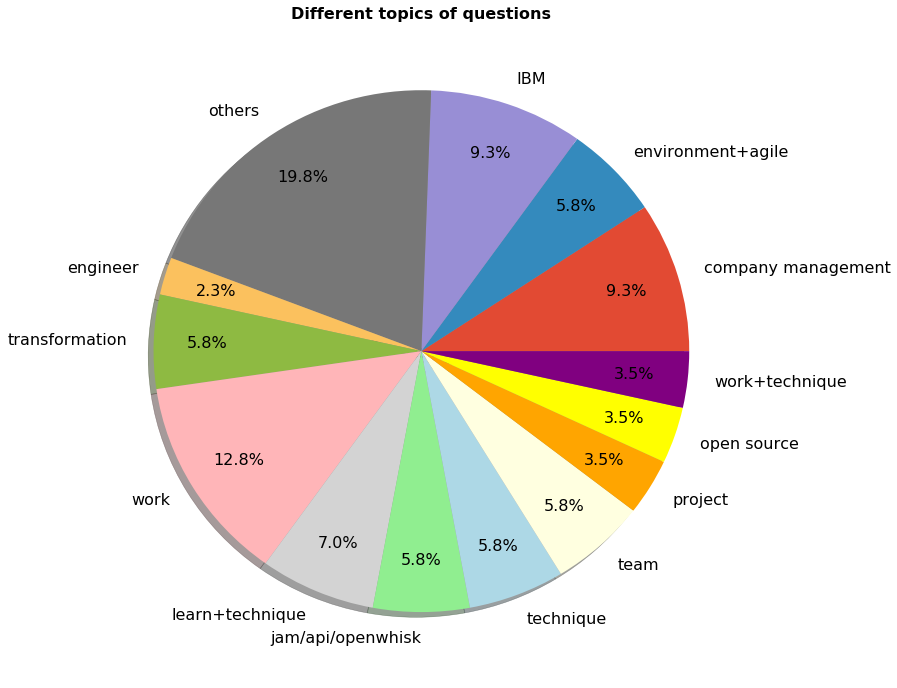

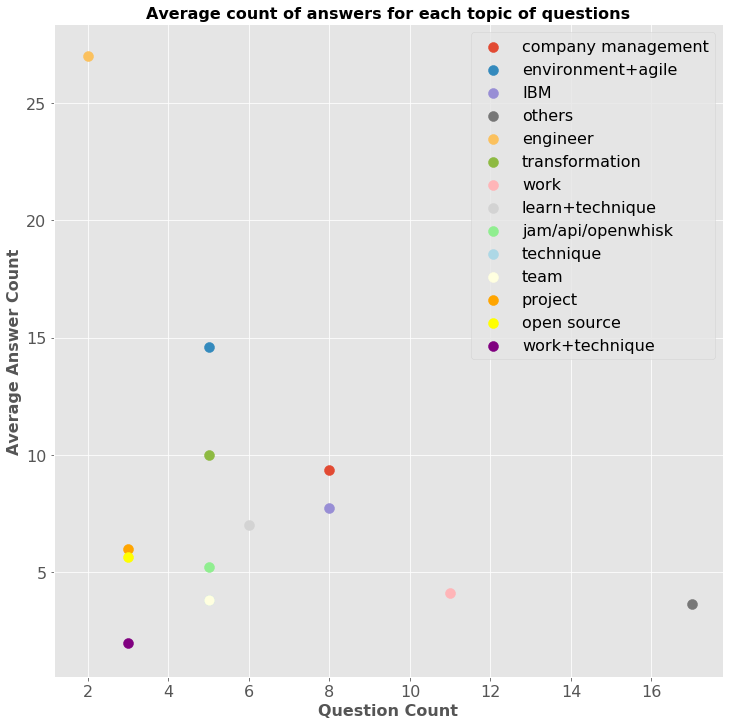

In [142]:
rcParams['figure.figsize'] = 12,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle'] + \
['lightgrey', 'lightgreen', 'lightblue', 'lightyellow', 'orange', 'yellow', 'purple']
#expl = [0,1,0,0,0,0,0,0,0,0,0]
f = ax.pie(jamCluster['QuestionPct'], labels = jamCluster['topic'], colors = colors, autopct='%1.1f%%', \
            shadow=True, pctdistance=0.8)
ax.set_title('Different topics of questions')

f, ax = plt.subplots(1,1)
for n in range(14):
    nn = jamCluster['plt'][n]
    nn = nn.split('-')
    i = int(nn[0])
    j = float(nn[1])
    k = nn[2]
    ax.scatter(i,j, c = colors[n], s = 100, label = k)
    ax.set_xlabel('Question Count')
    ax.set_ylabel('Average Answer Count')
ax.set_title('Average count of answers for each topic of questions')
ax.legend()
ax.grid(True)

# <bold><font size = 5>Position title statistical analysis

<font size=4> 1. How many answers did people on each position make on average?

In [143]:
jamTitle = jamData.groupby('Position Title')['AnswerText'].count().rename('psnTitleAnsSum').reset_index()
jamTitle = jamTitle.sort_values('psnTitleAnsSum', ascending = False)
jamTitle

,Position Title,psnTitleAnsSum
27,Software Test Specialist,179
23,Software Developer,143
25,Software Release Manager,82
29,Technical Support Professional,42
21,Software Architect,39
7,Customer / Partner Engagement,9
22,Software Designer,8
9,Functional Manager,7
20,Project Manager,7
13,Infrastructure Architect,7


In [144]:
len(pd.unique(jamData['Position Title']))

31

In [145]:
jamData['Attr'] = jamData['Attr 1'].map(lambda x: str(x)) + '+' + jamData['Attr 2'].map(lambda x: str(x)) + '+' + \
jamData['Attr 3'].map(lambda x: str(x)) + '+' + jamData['Attr 4'].map(lambda x: str(x)) + '+' + \
jamData['Attr 5'].map(lambda x: str(x)) + '+' + jamData['Attr 6'].map(lambda x: str(x)) + '+' + \
jamData['Attr7'].map(lambda x: str(x))

In [146]:
jamData

,QuestionID,QuestionTitle,QuestionCreatedTime,AnswerID,AnswerText,AnswerCreateTime,Attr 1,Attr 2,Attr 3,Attr7,Attr 4,Attr 5,Attr 6,Position Title,QuesText,QuesSimText,cluster,words,topic,Attr
0,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a1b6d9ed02fd4253850df574e1e6c9eb,Yes,2017-08-17 09:57,7,c,1,S0,a1,1,C0,Software Developer,<snownlp.SnowNLP object at 0x148970c50>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile,7+c+1+a1+1+C0+S0
1,1718f85eac0d416c99340c2688c31d5b,"David Kenny在上午的TownHall上说""Powerpoint is neithe...",2017-08-31 08:52,c2b9bcd7236b4714afa786e35736c52c,不能把所有问题都丢到公司来解决,2017-08-31 06:50,9,c,1,S0,a1,1,C3,Software Developer,<snownlp.SnowNLP object at 0x148970a90>,"David Kenny在上午的TownHall上说""Powerpoint is neithe...",12.0,(),others,9+c+1+a1+1+C3+S0
2,b4b8c86e3727481198a19ee5308d1e81,如何才能在Lab工作的每一天都有好心情,2017-08-14 14:21,bfe1c5746a5e499cb18a787c47beb44e,"Have a harmonious, interesting and lovely team~",2017-08-16 06:37,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970dd8>,如何才能在Lab工作的每一天都有好心情,0.0,"('工作',)",work,2+c+1+a0+0+C0+S0
3,688bb4156caf46c8ad6c09a2eabd7ac4,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...,2017-08-17 14:39,62b74a06d35e4a01b718809896f16834,有更好的处理工作和人际关系的能力，和不同的人一起做不同的事，在不同的方面都有所改变。突破自己...,2017-08-22 02:09,2,c,1,S0,a0,0,C0,Software Developer,<snownlp.SnowNLP object at 0x148970e48>,你最想在工作上做的一个转变（Transformation）是什么，不限于职业规划的转变，可以...,11.0,"('工作', '管理', '转型', '知识', '方式', '转变')",transformation,2+c+1+a0+0+C0+S0
4,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,16a769618f5545828bfde7fada4e9f9a,把握市场需求,2017-08-24 12:01,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970eb8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,11.0,"('技术', '转型', '重要', 'ibm', '成功')",transformation,7+c+1+a1+0+C3+S0
5,8963f92c65f449b291390817479d578d,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...,2017-08-24 16:33,ac919395d5e4415497c7bda554021bf8,把握时机，理解市场，抓住用户心理的人，岗位不限,2017-08-24 12:00,7,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970f60>,你认为你所在的产品或项目最需要什么人才，才能够成功？为什么？比如，深刻理解市场的产品经理，技...,4.0,"('项目', '技术', '开发', '产品', '成功', '测试')",project,7+c+1+a1+0+C3+S0
6,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,6a9b64e6b10b4582afc9b2d9925dee6f,喜欢,2017-08-21 01:39,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970fd0>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile,1+c+1+a1+0+C3+S0
7,8d57d41da3c6454fb3a767e1bee55b12,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",2017-08-21 19:21,f4dbdf2426564f01850e6d14adf06ee4,做好自己的工作,2017-08-22 03:17,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970358>,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",3.0,"('ibm',)",IBM,1+c+1+a1+0+C3+S0
8,026dffc3cfea402ca5f4c3a93c07f3b8,Do you like our new Agile Open Office?,2017-08-17 14:31,a807458a36874144887085ae24a9cef1,like very much,2017-08-18 03:50,1,c,1,S0,a1,0,C3,Software Developer,<snownlp.SnowNLP object at 0x148970438>,Do you like our new Agile Open Office?,10.0,"('agile', '办公室')",environment+agile,1+c+1+a1+0+C3+S0
9,39254631ef254d9a9c8b66f171d721cd,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,2017-08-24 16:04,d97d76aba81844aab382f1c6a31238a5,技术。如果技术不领先，谈何满足客户需求。技术足够领先的情况下，甚至可以创造客户需求。,2017-08-24 09:20,11,b,1,S0,a1,1,C3,Information Architect,<snownlp.SnowNLP object at 0x1489704a8>,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,11.0,"('技术', '转型', '重要', 'ibm', '成功')",transformation,11+b+1+a1+1+C3+S0


<font size=3>I suppose the people with totally different attributes and position title are unique person, and there are totally 199 person (on 31 different position) have participated in answering these questions.

In [147]:
jamPsnCnt = jamData.groupby('Position Title')['Attr'].nunique().rename('psnTitleSum').reset_index()
jamPsnCnt = jamPsnCnt.sort_values('psnTitleSum', ascending = False).reset_index(drop = True)
jamPsnCnt['psnSum'] = jamPsnCnt['psnTitleSum'].sum()
jamPsnCnt['psnTitlePct'] = jamPsnCnt['psnTitleSum']/jamPsnCnt['psnSum']
jamPsnCnt

,Position Title,psnTitleSum,psnSum,psnTitlePct
0,Software Developer,79,199,0.396985
1,Software Test Specialist,40,199,0.201005
2,Software Release Manager,16,199,0.080402
3,Software Architect,13,199,0.065327
4,Technical Support Professional,6,199,0.030151
5,Software Designer,5,199,0.025126
6,Information Developer,5,199,0.025126
7,Project Manager,4,199,0.020101
8,Application Architect,3,199,0.015075
9,Software Performance Analyst,3,199,0.015075


In [148]:
jamPsnCnt[11:].sum()

Position Title    Functional ManagerPortals & Collaboration Sols...
psnTitleSum                                                      23
psnSum                                                         3781
psnTitlePct                                                0.115578
dtype: object

In [149]:
jamTitle[11:].sum()

Position Title    Business Operations SpecialistAdministrative S...
psnTitleAnsSum                                                   40
dtype: object

In [150]:
jamTitle = jamTitle.merge(jamPsnCnt, on = 'Position Title')
jamTitle['psnTitleAnsAvgCnt'] = jamTitle['psnTitleAnsSum']/jamTitle['psnTitleSum']
jamTitle.head()

,Position Title,psnTitleAnsSum,psnTitleSum,psnSum,psnTitlePct,psnTitleAnsAvgCnt
0,Software Test Specialist,179,40,199,0.201005,4.475000
1,Software Developer,143,79,199,0.396985,1.810127
2,Software Release Manager,82,16,199,0.080402,5.125000
3,Technical Support Professional,42,6,199,0.030151,7.000000
4,Software Architect,39,13,199,0.065327,3.000000


Those position title after top-10 are all merged to "Others"

In [151]:
jamPsnPlt = jamTitle.head(10)
jamPsnPlt = pd.concat([jamPsnPlt, pd.DataFrame({'Position Title': ['Others'], 'psnTitleAnsSum': [39], 'psnTitleSum': [23],\
                                                'psnSum': [199], 'psnTitleAnsAvgCnt': [39/23],'psnTitlePct': [0.115578]})], \
                      axis = 0).reset_index(drop = True)
jamPsnPlt['psnTitlePct'] = jamPsnPlt['psnTitlePct'].map(lambda x: x+0.0032)

In [152]:
jamPsnPlt

,Position Title,psnSum,psnTitleAnsAvgCnt,psnTitleAnsSum,psnTitlePct,psnTitleSum
0,Software Test Specialist,199,4.475000,179,0.204205,40
1,Software Developer,199,1.810127,143,0.400185,79
2,Software Release Manager,199,5.125000,82,0.083602,16
3,Technical Support Professional,199,7.000000,42,0.033351,6
4,Software Architect,199,3.000000,39,0.068527,13
5,Customer / Partner Engagement,199,4.500000,9,0.013250,2
6,Software Designer,199,1.600000,8,0.028326,5
7,Functional Manager,199,3.500000,7,0.013250,2
8,Project Manager,199,1.750000,7,0.023301,4
9,Infrastructure Architect,199,3.500000,7,0.013250,2


In [153]:
jamPsnPlt['plt'] = jamPsnPlt['psnTitleSum'].map(lambda x: str(x)) + '+' + \
jamPsnPlt['psnTitleAnsAvgCnt'].map(lambda x: str(x))  + '+' + \
jamPsnPlt['Position Title'].map(lambda x: str(x)) 

In [154]:
jamPsnPlt

,Position Title,psnSum,psnTitleAnsAvgCnt,psnTitleAnsSum,psnTitlePct,psnTitleSum,plt
0,Software Test Specialist,199,4.475000,179,0.204205,40,40+4.475+Software Test Specialist
1,Software Developer,199,1.810127,143,0.400185,79,79+1.8101265822784811+Software Developer
2,Software Release Manager,199,5.125000,82,0.083602,16,16+5.125+Software Release Manager
3,Technical Support Professional,199,7.000000,42,0.033351,6,6+7.0+Technical Support Professional
4,Software Architect,199,3.000000,39,0.068527,13,13+3.0+Software Architect
5,Customer / Partner Engagement,199,4.500000,9,0.013250,2,2+4.5+Customer / Partner Engagement
6,Software Designer,199,1.600000,8,0.028326,5,5+1.6+Software Designer
7,Functional Manager,199,3.500000,7,0.013250,2,2+3.5+Functional Manager
8,Project Manager,199,1.750000,7,0.023301,4,4+1.75+Project Manager
9,Infrastructure Architect,199,3.500000,7,0.013250,2,2+3.5+Infrastructure Architect


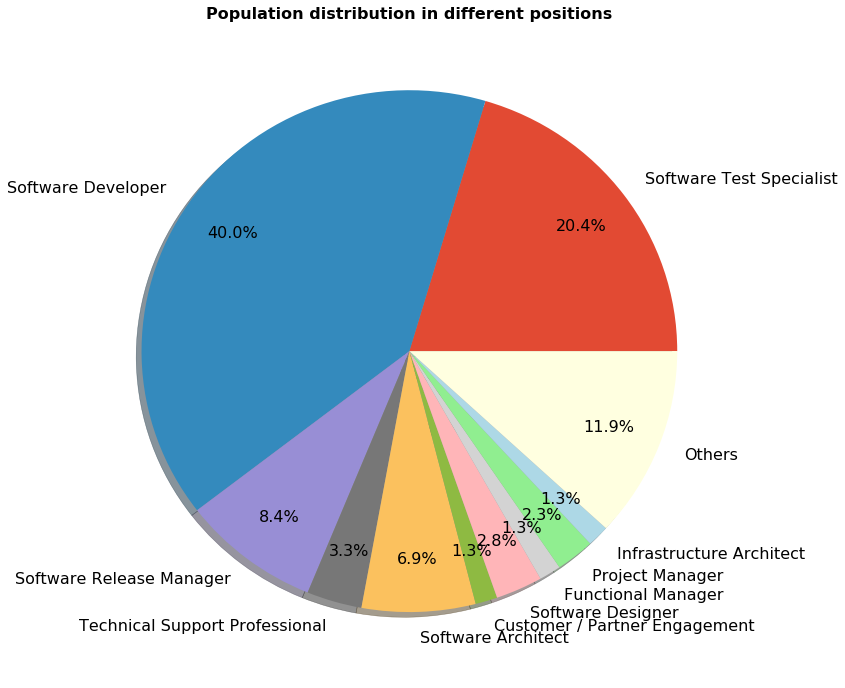

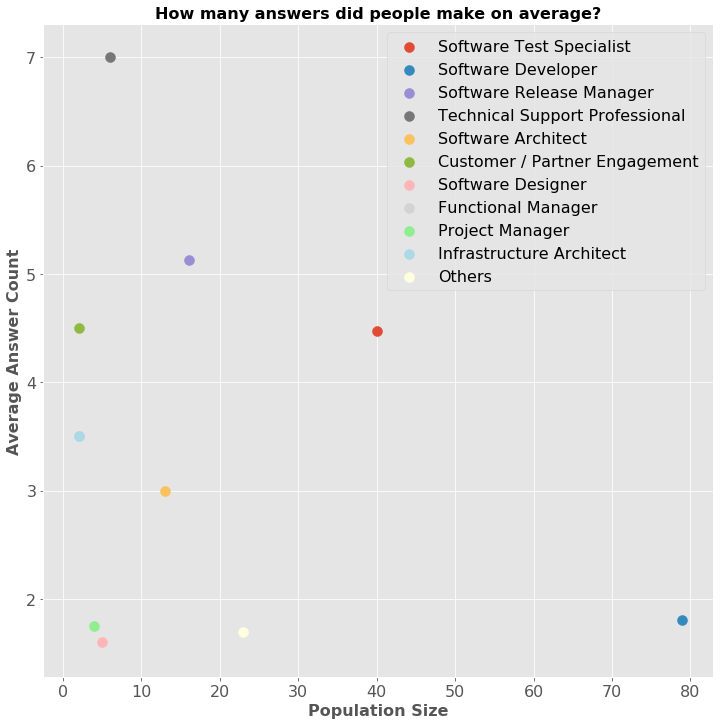

In [155]:
rcParams['figure.figsize'] = 12,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle'] + ['lightgrey', 'lightgreen', 'lightblue', 'lightyellow', 'purple']
#expl = [0,1,0,0,0,0,0,0,0,0,0]
f = ax.pie(jamPsnPlt['psnTitlePct'], labels = jamPsnPlt['Position Title'], colors = colors, autopct='%1.1f%%', \
            shadow=True, pctdistance=0.8)
ax.set_title('Population distribution in different positions')

f, ax = plt.subplots(1,1)
for n in range(11):
    nn = jamPsnPlt['plt'][n]
    nn = nn.split('+')
    i = int(nn[0])
    j = float(nn[1])
    k = nn[2]
    ax.scatter(i,j, c = colors[n], s = 100, label = k)
    ax.set_xlabel('Population Size')
    ax.set_ylabel('Average Answer Count')
ax.set_title('How many answers did people make on average?')
ax.legend()
ax.grid(True)

<font size=4> 2. Statistical analysis on question topic & position title level

1) How many (percentage) people on position A have answered questions of topic 1?

2) How many (percentage) people who have answered questions of topic 1 were from position A?

In [156]:
jamAnsPerson = jamData.groupby(['Attr 1', 'Attr 2', 'Attr 3', 'Attr 4', 'Attr 5', 'Attr 6', 'Attr7', 'Position Title'])[
    'AnswerText'].count().rename('AnswerUniqueCnt').reset_index().sort_values(
    'AnswerUniqueCnt', ascending = False).reset_index(drop = True)
jamAnsPerson.head()

,Attr 1,Attr 2,Attr 3,Attr 4,Attr 5,Attr 6,Attr7,Position Title,AnswerUniqueCnt
0,5,b,1,a2,1,C1,S7,Software Test Specialist,55
1,1,a,0,a2,1,C3,S7,Software Release Manager,33
2,13,a,1,a3,1,C3,S9,Technical Support Professional,26
3,2,a,0,a3,0,C0,S11,Software Release Manager,18
4,11,a,1,a3,1,C3,S4,Technical Support Professional,12


In [157]:
jamCopy = jamData.copy()
psnTitleSet = set(jamPsnPlt['Position Title']).difference({'Others'})
psnTitleSet

{'Customer / Partner Engagement',
 'Functional Manager',
 'Infrastructure Architect',
 'Project Manager',
 'Software Architect',
 'Software Designer',
 'Software Developer',
 'Software Release Manager',
 'Software Test Specialist',
 'Technical Support Professional'}

In [158]:
jamCopy.loc[jamCopy['Position Title'].map(lambda x: x not in psnTitleSet), 'Position Title'] = 'Others'

In [159]:
jamTitleCluster = jamCopy.groupby(['cluster', 'topic', 'Position Title'])['Attr'].nunique().rename('AnswerCnt').reset_index().sort_values(
    'AnswerCnt', ascending = False)
jamTitleCluster.loc[jamTitleCluster['Position Title'].map(lambda x: x not in psnTitleSet), 'Position Title'] = 'Others'
jamTitleCluster = jamTitleCluster.groupby(['cluster', 'topic', 'Position Title'])['AnswerCnt'].sum().reset_index()

In [160]:
jamCluster = jamCluster.rename(columns =  {'AnswerCnt': 'AnswerSum'})
jamTitleCluster = jamTitleCluster.merge(jamCluster, on = ['cluster', 'topic'], how = 'left')
jamTitleCluster['Cnt/Sum'] = jamTitleCluster['AnswerCnt']/jamTitleCluster['AnswerSum']
jamTitleCluster = jamTitleCluster.sort_values('Cnt/Sum', ascending = False)
# Rename the columns
jamTitleCluster = jamTitleCluster.rename(columns = {'AnswerCnt': 'topicPsnAnsSum', 'AnswerSum': 'topicAnsSum', \
                                                   'Cnt/Sum': 'topicPsnAnsPct', 'Ans/Ques': 'topicAnsQuesAvg', \
                                                   'QuestionCnt': 'topicQuesSum'})
jamTitleCluster.head()

,cluster,topic,Position Title,topicPsnAnsSum,topicAnsSum,topicQuesSum,topicAnsQuesAvg,QuestionSum,QuestionPct,plt,topicPsnAnsPct
102,13,jam/api/openwhisk,Software Test Specialist,10,26,5,5.200000,86,0.058140,5-5.2-jam/api/openwhisk,0.384615
15,2,technique,Software Developer,7,19,5,3.800000,86,0.058140,5-3.8-technique,0.368421
65,9,open source,Software Developer,6,17,3,5.666667,86,0.034884,3-5.666666666666667-open source,0.352941
51,7,work+technique,Software Release Manager,2,6,3,2.000000,86,0.034884,3-2.0-work+technique,0.333333
10,1,company management,Software Developer,24,75,8,9.375000,86,0.093023,8-9.375-company management,0.320000


In [161]:
jamTitleCluster = jamTitleCluster.merge(jamPsnPlt, on = 'Position Title', how = 'left')
jamTitleCluster['psnAnsTopicPct'] = jamTitleCluster['topicPsnAnsSum']/jamTitleCluster['psnTitleSum']
jamTitleCluster.head()

,cluster,topic,Position Title,topicPsnAnsSum,topicAnsSum,topicQuesSum,topicAnsQuesAvg,QuestionSum,QuestionPct,plt_x,topicPsnAnsPct,psnSum,psnTitleAnsAvgCnt,psnTitleAnsSum,psnTitlePct,psnTitleSum,plt_y,psnAnsTopicPct
0,13,jam/api/openwhisk,Software Test Specialist,10,26,5,5.200000,86,0.058140,5-5.2-jam/api/openwhisk,0.384615,199,4.475000,179,0.204205,40,40+4.475+Software Test Specialist,0.250000
1,2,technique,Software Developer,7,19,5,3.800000,86,0.058140,5-3.8-technique,0.368421,199,1.810127,143,0.400185,79,79+1.8101265822784811+Software Developer,0.088608
2,9,open source,Software Developer,6,17,3,5.666667,86,0.034884,3-5.666666666666667-open source,0.352941,199,1.810127,143,0.400185,79,79+1.8101265822784811+Software Developer,0.075949
3,7,work+technique,Software Release Manager,2,6,3,2.000000,86,0.034884,3-2.0-work+technique,0.333333,199,5.125000,82,0.083602,16,16+5.125+Software Release Manager,0.125000
4,1,company management,Software Developer,24,75,8,9.375000,86,0.093023,8-9.375-company management,0.320000,199,1.810127,143,0.400185,79,79+1.8101265822784811+Software Developer,0.303797


In [162]:
plt1 = jamTitleCluster[['topic', 'Position Title', 'topicPsnAnsPct']]
#plt1_plot = plt1.pivot('topic', 'Position Title').reset_index()
#plt1_plot.head(1)
#plt1_plot.columns

In [163]:
#plt1_plot.columns = ['topic','Customer / Partner Engagement', 'Functional Manager', 'Infrastructure Architect', \
#                     'Others', 'Project Manager', 'Software Architect', 'Software Designer', 'Software Developer', \
#                     'Software Release Manager', 'Software Test Specialist', 'Technical Support Professional']
#plt1_plot.head(1)

In [164]:
#f = plt1_plot.plot(kind = 'bar', rot = 0, width = .7, figsize=(20, 10), \
#                   title = 'People percentage in different position title among all that answer certain topic of questions')
#f.set_xlabel('Question Topic')
#f.set_xticklabels(plt1_plot['topic'], rotation = 45)

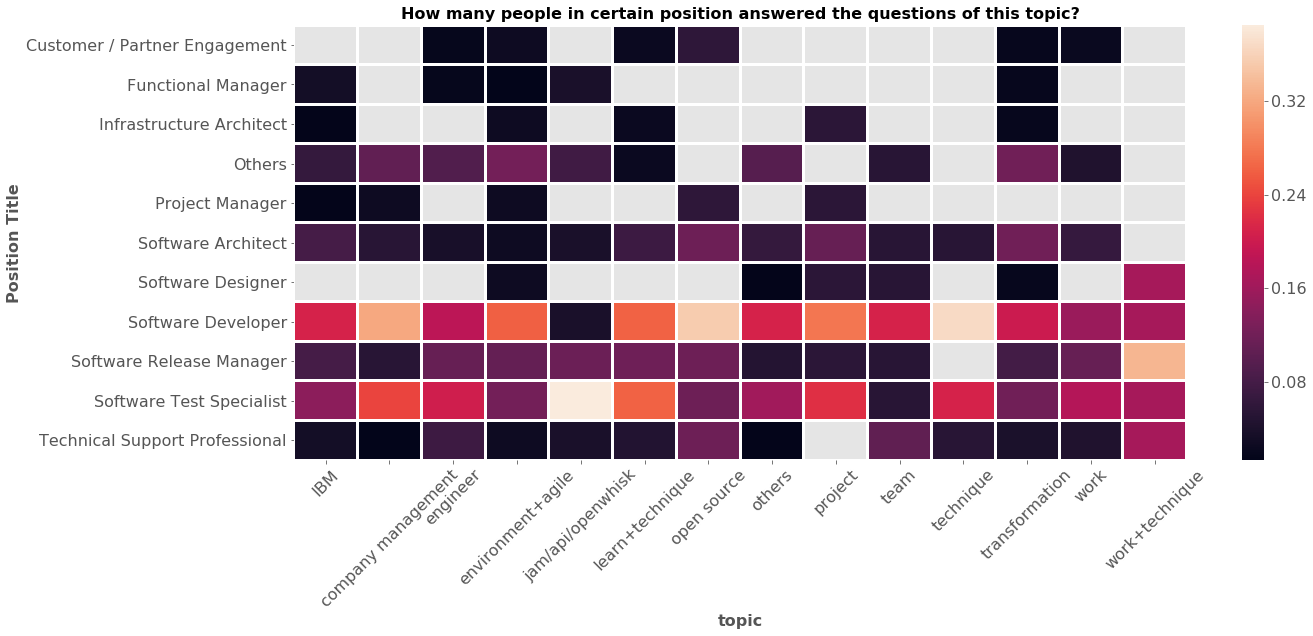

In [165]:
import seaborn as sns
plt1_htmp = plt1.pivot('Position Title', 'topic', 'topicPsnAnsPct')
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(plt1_htmp, annot=False, ax=ax, fmt="d", linewidths=2)
plt.xticks(rotation = 45)
plt.title('How many people in certain position answered the questions of this topic?')
plt.show()

In [166]:
plt2 = jamTitleCluster[['topic', 'Position Title', 'psnAnsTopicPct']]
#plt2_plot = plt1.pivot('Position Title', 'topic').reset_index()
#plt2_plot.head(1)
#plt2_plot.columns

In [167]:
#plt2_plot.columns = ['Position Title','IBM', 'company manage', 'engineer', 'environment+agile', 'jam/api/openwhisk', \
#                     'learn+technique','open source', 'others', 'project', 'team', 'technique', 'transformation', \
#                     'work', 'work+technique']
#plt2_plot.head(1)

In [168]:
#f = plt2_plot.plot(kind = 'bar', rot = 0, width = .7, figsize=(20, 10), \
#                   title = 'People percentage of answering different topics of questions among all that in cetain position title')
#f.set_xlabel('Position Title')
#f.set_xticklabels(plt2_plot['Position Title'], rotation = 45)

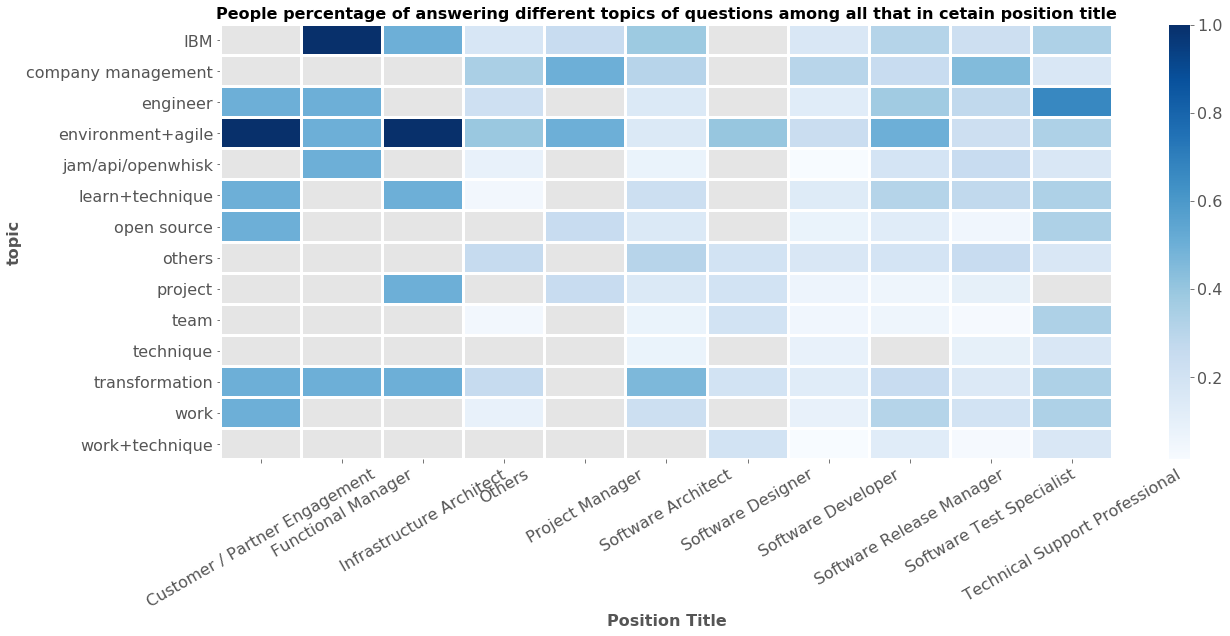

In [169]:
import matplotlib
plt2_htmp = plt2.pivot('topic', 'Position Title', 'psnAnsTopicPct')
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(plt2_htmp, annot=False, ax=ax, fmt="d", cmap = matplotlib.cm.Blues, linewidths=2,)
plt.title('People percentage of answering different topics of questions among all that in cetain position title')
plt.xticks(rotation = 30)
plt.show()

In [170]:
print(pd.unique(jamData['Attr 1']))
print(pd.unique(jamData['Attr 2']))
print(pd.unique(jamData['Attr 3']))
print(pd.unique(jamData['Attr 4']))
print(pd.unique(jamData['Attr 5']))
print(pd.unique(jamData['Attr 6']))
print(pd.unique(jamData['Attr7']))

[ 7  9  2  1 11  3  6 10 12  5  4 15 13  8 14]
['c' 'b' 'a' 'e' 'd' 'f']
[1 0]
['a1' 'a0' 'a2' 'a3' 'a4' 'a5' 'a6']
[1 0]
['C0' 'C3' 'C1' 'C2' 'C4' 'C5']
['S0' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S12' 'S13'
 'S14' 'S15' 'S16' 'S17' 'S18' 'S19' 'S20' 'S21' 'S22' 'S24' nan]


# <bold><font size=5>Word Segementation

<font size=4>1. Get the set of all words except the stop words, used for the intersection with positive/negative dictionary to filter the words in dictionary which are inappropriate for this survey.

2.Also get the noun, adjective, adverb, verb and conjunction words for each answer, but so far, I haven't utilized these words.

In [174]:
def procTxtFile(filePath):
    fileContent = open(filePath).read()
    fileList = fileContent.replace(' ', '').replace("'", '').replace('\n', '').split(',')
    
    return set(fileList)

In [175]:
# stopwords for chinese and english
stopwords_chn = procTxtFile('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/stopwords_chinese.txt')
stopwords_eng = set(stopwords.words('english'))
stopwords_eng = stopwords_eng.union({'...', "n't", "'s", "'m", '1.', '2.', '3.', '4.'})
stopwords_total = stopwords_chn.union(stopwords_eng)
stopwords_total.difference_update({'yes', 'no', 'not'})

# 调节单个词语的词频，使其更容易/不容易被划分出来
jieba.add_word('不限于', freq = 200, tag=None)
jieba.add_word('不需要', freq = 200, tag=None)
jieba.add_word('不能够', freq = 200, tag=None)
jieba.add_word('不可以', freq = 200, tag=None)
jieba.add_word('不想要', freq = 200, tag=None)
jieba.add_word('不希望', freq = 200, tag=None)
jieba.add_word('不理解', freq = 200, tag=None)
jieba.add_word('不了解', freq = 200, tag=None)
jieba.add_word('有没有', freq = 200, tag=None)
jieba.add_word('小确幸', freq = 200, tag=None)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/r1/6cqp3b0j6019632bqzy1g5nh0000gp/T/jieba.cache
Loading model cost 1.253 seconds.
Prefix dict has been built succesfully.


In [176]:
# The flag of words to be dropped during word segementation
stopflags_chn = ['x']
stopflags_eng = ['SYM', 'POS']

def jiebaClearText(text):
    reg = re.compile(u"[\u4e00-\u9fa5]+")
# search for Chinese words, to use different package for English sentences and Chinese sentences
    wordList = []
    if reg.search(text):
        segList = pseg.lcut(text, HMM = True)
        for wordSeg in segList:
            try:
                [word, flag] = str(wordSeg).split('/')
                if (len(word.strip())>1) and (flag not in stopflags_chn):
                    wordList.append(word)
                    
            except:
                continue
    else:
        segList = pos_tag(word_tokenize(text))
        for (word, flag) in segList:
            if (len(word.strip())>1) and (flag not in stopflags_eng):
                wordList.append(word)
    return tuple(set(wordList))

In [177]:
jamData['AnsNlpText'] = jamData['AnswerText'].map(lambda x: SnowNLP(x))
jamData['AnsSimText'] = jamData['AnsNlpText'].map(lambda x: str(x.han).lower())
jamData['AnsWords_1'] = jamData['AnsSimText'].map(lambda x: jiebaClearText(x))

In [178]:
# return all words segmented by function jiebaClearText
def allWordSet(totalWord):
    wordsTotal = []
    for words in totalWord:
        wordsTotal.append(list(words))
    allWords = sum(wordsTotal, [])
    allSet = set(allWords)
    allList = list(allWords)
    return allList, allSet

In [185]:
def open_dict(Dict = 'mydict', path='/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/Dict/'):
    path = path + '%s.txt' % Dict
    dictionary = open(path, 'r', encoding='utf-8')
    dict = []
    for word in dictionary:
        word = word.strip('\n').replace(' ', '')
        dict.append(word)
    return dict

In [186]:
allList, allSet = allWordSet(pd.unique(jamData['AnsWords_1']))
posdict = open_dict(Dict = 'positive')
negdict = open_dict(Dict = 'negative')

<font size=4>After get the intersection between all words with positive/negative words in dictionary (download from internet), creat the new dictionary for positive words and negative words artificially.

In [187]:
def open_txt(file):
    txtFile= open(file).readlines()
    txtList = []
    for i in txtFile:
        txtList.append(i.replace(',','').replace('\n','').replace("'",'').replace(' ',''))
    return txtList

In [188]:
#wordCtr = Counter(allList)
#wordDict = sorted(wordCtr.items(), key = itemgetter(1), reverse = True)
#len(wordDict)

In [189]:
# save the stopwords as txt file
#stopTotalFile = open('stopwords_total.txt', 'w+')
#total_sw_string = '\n'.join(list(stopwords_total))
#stopTotalFile.write(total_sw_string)

In [190]:
# 停用词词表
chn_sw = set()
#stopwords_chn
eng_sw = set()
#stopwords_eng
#eng_sw.union({'ibm'})
#eng_sw.difference_update({'yes', 'no', 'not'})
#total_sw = chn_sw.union(eng_sw)

In [191]:
vSet = {'v', 'vd', 'vn', 'vi'}
aSet = {'a', 'ad', 'an'}

def parseWords(input0, stopwords = set()):
    # 分词+选词
    wordall = []
    vwordall = []
    awordall = []
    nwordall = []
    dwordall = []
    cwordall = []
    engwordall = []
    a_engwordall = []
    v_engwordall = []
    n_engwordall = []
    d_engwordall = []
    c_engwordall = []
    for t in input0: 
        words = pseg.lcut(t, HMM = True)
        word = []; vword = []; aword = []; nword = []; cword = []; dword = []; 
        engword = []; n_engword= []; v_engword=[]; a_engword=[]; c_engword=[]; d_engword=[];
        for w in words:            
            if (w.flag == 'eng') and (w.word.lower() not in eng_sw):
                word.append(w.word.lower())
                engword.append(w.word.lower())
                if engTag(w.word.lower()) == 'a':
                    a_engword.append(w.word.lower())
                elif engTag(w.word.lower()) == 'v':
                    v_engword.append(w.word.lower())
                elif engTag(w.word.lower()) == 'n':
                    n_engword.append(w.word.lower()) 
                elif engTag(w.word.lower()) == 'c':
                    c_engword.append(w.word.lower()) 
                elif engTag(w.word.lower()) == 'd':
                    d_engword.append(w.word.lower()) 
                # if nltk.pos_tag(['yes'])
            elif ((w.flag == 'n' or w.flag in vSet or w.flag in aSet or w.flag == 'd' or w.flag == 'c') and (
                w.word not in stopwords) and (len(w.word)>1)): 
                if w.flag == 'n':
                    nword.append(w.word)
                elif w.flag == 'v':
                    vword.append(w.word)
                elif w.flag == 'a':
                    aword.append(w.word)
                elif w.flag == 'd':
                    dword.append(w.word)
                elif w.flag == 'c':
                    cword.append(w.word)
                word.append(w.word)
        wordall.append(word)
        nwordall.append(nword)
        vwordall.append(vword)
        awordall.append(aword)
        cwordall.append(cword)
        dwordall.append(dword)
        n_engwordall.append(n_engword)
        a_engwordall.append(a_engword)
        v_engwordall.append(v_engword)
        c_engwordall.append(c_engword)
        d_engwordall.append(d_engword)       
        engwordall.append(engword)
    return wordall, vwordall, awordall, nwordall, cwordall, dwordall, engwordall, n_engwordall, v_engwordall, \
    a_engwordall, c_engwordall, d_engwordall

def engTag(word):
    res = ''
    att = pos_tag([word])[0][1]
    if att in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']:
        res = 'a'
    elif att in ['NN', 'NNS', 'NNP', 'NNPS']:
        res = 'n'
    elif att in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        res = 'v'
    elif att in ['RB', 'RBR', 'RBS']:
        res = 'd'
    elif att == 'CC':
        res = 'c'
    return res

In [192]:
jamAns = jamData[['AnsSimText','AnswerID']]
jamAns['answords'], jamAns['vwords'], jamAns['awords'], jamAns['nwords'], jamAns['cwords'], jamAns['dwords'], \
jamAns['engwords'],jamAns['n_engwords'], jamAns['v_engwords'], jamAns['a_engwords'], jamAns['c_engwords'],\
jamAns['d_engwords'] = parseWords(jamAns['AnsSimText'])

<font size=4>Get the noun, adjective, adverb, verb and conjunction words for each answer, for further use.

# <bold><font size=5> Score sentiment (positive)

<font size=4>
1. Find the positive and negative words in each answer according to word segementation and positive & negative dictionary.

2. Find the degree words (positive/negative score x weight) and deny words (positive/negative x -1 for single deny word) among the three words in front of this emotional words, also find the noun words for further use.

3. Find the "!" in each answer, if the previous word is a emotional word, then the positive/negative score + 2.

4. Also find the noun words among the three words after this emotional word for further use.

5. Further processing for the score less than zero.

In [196]:
dictpath = '/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/Dict/'
#这里要修改dict路径
deny_word = open_dict(Dict = '否定词', path = dictpath)
posdict = open_txt('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/Dict/positive_1.txt')
negdict = open_txt('/Users/huangweipeng/Desktop/JAM Culture Transformation/Jam notebook&data&ppt/Dict/negative_1.txt')
degree_word = open_dict(Dict = '程度级别词语', path= dictpath)
mostdict = degree_word[degree_word.index('extreme')+1 : degree_word.index('very')]#权重4，即在情感词前乘以3
verydict = degree_word[degree_word.index('very')+1 : degree_word.index('more')]#权重3
moredict = degree_word[degree_word.index('more')+1 : degree_word.index('ish')]#权重2
ishdict = degree_word[degree_word.index('ish')+1 : degree_word.index('last')]#权重0.5
## modify dict
posdict.append('好开心')
posdict.append('非常高兴')
posdict.append('更好')
negdict.append('太不亲')
negdict.append('速度慢')
negdict.append('慢')

In [197]:
def judgeodd(num):
    if (num % 2) == 0:
        return 'even'
    else:
        return 'odd'

In [198]:
def sentiment_score_list(dataset):
    #seg_sentence = dataset.split('。')
    seg = dataset
    count1 = []
    sentiword = []
    posword = []
    posdgword = []
    posdyword = []
    negword = []
    negdgword = []
    negdyword = []
    #jieba.analyse.set_stop_words('stopwords_total.txt')
    segtmp = jieba.lcut(seg, cut_all = False, HMM = True)  #把句子进行分词，以列表的形式返回   
    i = 0 #记录扫描到的词的位置
    a = 0 #记录情感词的位置
    poscount = 0 #积极词的第一次分值
    poscount2 = 0 #积极词反转后的分值
    poscount3 = 0 #积极词的最后分值（包括叹号的分值）
    negcount = 0
    negcount2 = 0
    negcount3 = 0
    #print(segtmp)
    for k in range(len(segtmp)):
        word = segtmp[k]
        if word in posdict:  # 判断词语是否是情感词
            sentiword.append(word)
            pword = word
            poscount += 1
            c = 0
            for w in segtmp[k-1:k-4:-1]: # 扫描情感词前的程度词
                if w in mostdict:
                    poscount *= 4.0
                    posdgword.append(w)
                    pword = w + '+' + pword
                elif w in verydict:
                    poscount *= 3.0
                    posdgword.append(w)
                    pword = w + '+' + pword
                elif w in moredict:
                    poscount *= 2.0
                    posdgword.append(w)
                    pword = w + '+' + pword
                elif w in ishdict:
                    poscount *= 0.5
                    posdgword.append(w)
                    pword = w + '+' + pword
                elif w in deny_word:
                    c += 1
                    posdyword.append(w)
                    pword = w + '+' + pword
                elif pseg.lcut(w)[0].flag == 'n':
                    pword = w + '+' + pword
            for w in segtmp[k+1:k+4]:
                if pseg.lcut(w)[0].flag == 'n':
                    pword = pword + '+' + w
            posword.append(pword)
            if judgeodd(c) == 'odd':  # 扫描情感词前的否定词数
                poscount *= -1.0
                poscount2 += poscount
                poscount = 0
                poscount3 = poscount + poscount2 + poscount3
                poscount2 = 0
            else:                    
                poscount3 = poscount + poscount2 + poscount3
                poscount = 0

        elif word in negdict:  # 消极情感的分析，与上面一致
            sentiword.append(word)
            nword = word
            negcount += 1
            d = 0
            for w in segtmp[k-1:k-4:-1]: # 扫描情感词前的程度词
                if w in mostdict:
                    negcount *= 4.0
                    negdgword.append(w)
                    nword = w + '+' + nword
                elif w in verydict:
                    negcount *= 3.0
                    negdgword.append(w)
                    nword = w + '+' + nword
                elif w in moredict:
                    negcount *= 2.0
                    negdgword.append(w)
                    nword = w + '+' + nword
                elif w in ishdict:
                    negcount *= 0.5
                    negdgword.append(w)
                    nword = w + '+' + nword
                elif w in deny_word:
                    d += 1
                    negdyword.append(w)
                    nword = w + '+' + nword
                elif pseg.lcut(w)[0].flag == 'n':
                    nword = w + '+' +  word
            for w in segtmp[k+1:k+4]:
                if pseg.lcut(w)[0].flag == 'n':
                    nword = nword + '+' + w
            negword.append(nword)
            if judgeodd(d) == 'odd':
                negcount *= -1.0
                negcount2 += negcount
                negcount = 0
                negcount3 = negcount + negcount2 + negcount3
                negcount2 = 0
            else:
                negcount3 = negcount + negcount2 + negcount3
                negcount = 0
        elif word == '！' or word == '!':  ##判断句子是否有感叹号
            if len(sentiword) == 0:
                poscount3 = poscount3
            elif (sentiword[-1] in posdict) & len(segtmp) < 2:
                poscount3 += 2
            elif (sentiword[-1] in negdict) & len(segtmp) < 2:
                negcount3 += 2
            elif (sentiword[-1] in posdict) & (segtmp[i-2] not in deny_word + negdict):
                poscount3 += 2
            elif (sentiword[-1] in negdict) & (segtmp[i-2] not in deny_word + posdict):
                negcount3 += 2
        # 以下是防止出现负数的情况
        pos_count = 0
        neg_count = 0
        if poscount3 < 0 and negcount3 >= 0:
            neg_count += negcount3 - poscount3
            pos_count = 0
        elif negcount3 < 0 and poscount3 >= 0:
            pos_count = poscount3 - negcount3
            neg_count = 0
        elif poscount3 < 0 and negcount3 <= 0:
            neg_count = -poscount3
            pos_count = -negcount3
        else:
            pos_count = poscount3
            neg_count = negcount3
        count1.append([pos_count, neg_count, word])
        poscount2 = 0 
        poscount3 = 0
        negcount2 = 0 
        negcount3 = 0
    return [count1, segtmp, posword, negword]

def sentiment_score(senti_score_list):
    mylist = (senti_score_list[0])
    # print(mylist)
    result = pd.DataFrame(mylist)
    result.columns = ['positive_score', 'negative_score', 'words']
    result['idx'] = 1
    ouput = result.groupby(['idx']).agg(['sum', 'mean', 'std']).reset_index()
    ouput['cutword'] = str(senti_score_list[1])
    ouput['posword'] = str(senti_score_list[2])
    #ouput['degreeword_pos'] = str(senti_score_list[3])
    #ouput['denyword_pos'] = str(senti_score_list[4])
    ouput['negword'] = str(senti_score_list[3])
    #ouput['degreeword_neg'] = str(senti_score_list[6])
    #ouput['denyword_neg'] = str(senti_score_list[7])
    return ouput

In [199]:
library = []
for sent in jamAns['answords'].values:
    for word in sent:
        library.append(word)

In [200]:
jamAns['engwordsPerct'] = jamAns[['answords', 'engwords']].apply(lambda x: 0 if len(x[0])==0 else len(x[1])/len(x[0]), axis = 1)
jamChn = jamAns[jamAns['engwordsPerct'] < 1].reset_index()
chnAns = pd.DataFrame()
for sen in jamChn['AnsSimText'].values:
    #print(sen)
    result = sentiment_score(sentiment_score_list(sen))
    result['AnsSimText'] = sen
    chnAns = chnAns.append(result)

In [201]:
# Calculate the positive percentage by positive & negative score for each Chinese answer 
def calcPosPct(data):
    pos = data[0]
    total = data[3]
    if total == 0:
        posPct = 0.5
    else:
        posPct = pos/total
    return posPct       

In [202]:
chnAns['total_score'] = chnAns['positive_score']['sum'] + chnAns['negative_score']['sum']
chnAns['positive_percentage'] = np.apply_along_axis(calcPosPct, 1, chnAns[['positive_score', 'total_score']].values)
jamChnAns = pd.concat([chnAns[['AnsSimText', 'positive_percentage', 'posword', 'negword']].reset_index(drop = True), 
           jamChn.drop(['AnsSimText'], axis = 1).reset_index(drop = True)], axis = 1)
jamChnAns.columns =  ['AnsSimText', 'positive_percentage'] + list(jamChnAns.columns)[2:]

In [203]:
jamChnAns.columns

Index([         'AnsSimText', 'positive_percentage',       ('posword', ''),
             ('negword', ''),               'index',            'AnswerID',
                  'answords',              'vwords',              'awords',
                    'nwords',              'cwords',              'dwords',
                  'engwords',          'n_engwords',          'v_engwords',
                'a_engwords',          'c_engwords',          'd_engwords',
             'engwordsPerct'],
      dtype='object')

In [204]:
jamChnAns = jamChnAns.rename(columns = {('posword', '') : 'posword', ('negword', ''): 'negword'})
jamChnAns.columns

Index(['AnsSimText', 'positive_percentage', 'posword', 'negword', 'index',
       'AnswerID', 'answords', 'vwords', 'awords', 'nwords', 'cwords',
       'dwords', 'engwords', 'n_engwords', 'v_engwords', 'a_engwords',
       'c_engwords', 'd_engwords', 'engwordsPerct'],
      dtype='object')

In [205]:
# Get the positive percentage by positive & negative score for each English answer 
jamEng = jamAns[jamAns['engwordsPerct'] == 1.0].reset_index()
jamEng['polarity'] = jamEng['AnsSimText'].map(lambda x: TextBlob(x).sentiment.polarity)
jamEng['positive_percentage'] = jamEng['polarity'].map(lambda x: (x+1)/2)

In [206]:
jamEngAns = jamEng.drop(['polarity'], axis =1)
#jamChnAns = jamChnAns[jamEngAns.columns]
jamDataAns = jamChnAns.append(jamEngAns).sort_values(by = ['index']).reset_index(drop = True)
print(len(jamDataAns))
jamDataAns.columns

570


Index(['AnsSimText', 'AnswerID', 'a_engwords', 'answords', 'awords',
       'c_engwords', 'cwords', 'd_engwords', 'dwords', 'engwords',
       'engwordsPerct', 'index', 'n_engwords', 'negword', 'nwords',
       'positive_percentage', 'posword', 'v_engwords', 'vwords'],
      dtype='object')

<font size=4> Because that the word "yes" in the English answers is not regarded as a positive word, but after the the inspect into the answers with word "yes", I suppose this word can be a positive word and get a positive percentage with 1.

In [207]:
pd.unique(jamData.loc[jamData['AnsSimText'].map(lambda x: 'yes' in x), 'QuesSimText'])

array(['Do you like our new Agile Open Office?',
       '我们新装修的Agile workspace， 你觉得还有味吗？', '你觉得这个OpenWhisk好用吗？',
       '你喜欢下午茶吗?请列出你喜欢的种类，或许不久公司会实现哦', '你的产品使用的技术是你感兴趣的么？',
       'Do you love IBM?', '你喜欢现在的工作模式吗？',
       "Did you learn any new skill this year ? What's it ?",
       '你觉得IBM是技术导向的么？'], dtype=object)

In [208]:
jamData.loc[jamData['QuesSimText'] == "Did you learn any new skill this year ? What's it ?", 'AnsSimText']

280                       agile planning
281    owasp top 10, burpsuite, zap,kali
282          yes, penetration test skill
Name: AnsSimText, dtype: object

In [209]:
posQuesSet = {'Do you like our new Agile Open Office?', '你觉得这个OpenWhisk好用吗？', '你的产品使用的技术是你感兴趣的么？', \
             "Did you learn any new skill this year ? What's it ?", '你喜欢下午茶吗?请列出你喜欢的种类，或许不久公司会实现哦', \
             'Do you love IBM?', '你喜欢现在的工作模式吗？'}

In [210]:
jamDataAns = jamDataAns.merge(jamData, on = ['AnsSimText', 'AnswerID'], how = 'left')
jamDataAns.loc[(jamDataAns['QuesSimText'].map(lambda x: x in posQuesSet) & (jamDataAns['AnsSimText'] == 'yes')), \
               'positive_percentage'] = 1.0

# <bold><font size=5> Sentiment Analysis

In [211]:
# Merge the each answer with the corresponding attribute and position title, and the topic of the corresponding question
jamStData = jamDataAns.loc[:,['QuesSimText', 'AnsSimText', 'Position Title', 'topic', 'cluster', 'positive_percentage', \
                             'Attr 1', 'Attr 2', 'Attr 3', 'Attr 4', 'Attr 5', 'Attr 6', 'Attr7']]

<font size=4>1. Get the data with positive/normal/negative sentiment to analysis the difference among different attributes.

In [212]:
jamNegData = jamStData.loc[jamStData['positive_percentage'] < 0.5].reset_index(drop = True)
jamPosData = jamStData.loc[jamStData['positive_percentage'] > 0.5].reset_index(drop = True)
jamNorData = jamStData.loc[jamStData['positive_percentage'] == 0.5].reset_index(drop = True)
print('# positive answers: ' + str(len(jamPosData)))
print('# normal answers: ' + str(len(jamNorData)))
print('# negative answers: ' + str(len(jamNegData)))

# positive answers: 231
# normal answers: 281
# negative answers: 58


In [213]:
#jamPosPsn = jamPosData.groupby('Position Title')['AnsSimText'].count().rename('AnsCount').reset_index()
#jamNegPsn = jamNegData.groupby('Position Title')['AnsSimText'].count().rename('AnsCount').reset_index()
#jamPsnSum = jamStData.groupby('Position Title')['AnsSimText'].count().rename('AnswerSum').reset_index()

In [214]:
#jamPosPsn = jamPosPsn.merge(jamPsnSum, on = 'Position Title')
#jamNegPsn = jamNegPsn.merge(jamPsnSum, on = 'Position Title')
#jamPosPsn['posPct'] = jamPosPsn['AnsCount']/jamPosPsn['AnswerSum']
#jamNegPsn['negPct'] = jamNegPsn['AnsCount']/jamNegPsn['AnswerSum']
#jamStPsn = jamNegPsn[['Position Title', 'negPct']].merge(jamPosPsn[['Position Title', 'posPct', 'AnswerSum']], \
#                                                         on = 'Position Title', how = 'outer')
#jamStPsn = jamStPsn.fillna(0)

In [215]:
#psnSet = list(pd.unique(jamStData['Position Title']))
#psnAnsSum = []
#for t in psnSet:
#    ansSum = int(jamStPsn.loc[jamStPsn['Position Title'] == t, 'AnswerSum'])
#    psnAnsSum.append(t + ': ' + str(ansSum))
#psnAnsSum

In [216]:
#jamStData = pd.read_csv('Question_Answer_PositivePct.csv')

In [217]:
# Attribute mapping
attr1 = {1: 'Harry Chang', 2: 'Cui Feng', 3: 'Ming Yi', 4: 'Michael Hu', 5: 'John Shen', 6: 'Ginger Tsai',\
         7: 'Wang Zhi Jun', 8: 'Felix Wang',9: 'YY', 10: 'Sally', 11: 'Katherine', 12: 'Jerry Zhu', 13: 'Jack Leung', \
         15: 'Tian Zhong'}
attr2 = {'a': 'Band 8', 'b': 'Band 7', 'c': 'Band 6', 'd': 'Band 10', 'e': 'Band 9'}
attr3 = {0: 'IsManager', 1: 'NotManager'}
attr4 = {'a1': '26-30', 'a2': '31-35', 'a3': '36-40', 'a4': '41-45', 'a5': '46-50'}
attr5 = {0: 'Female', 1: 'Male'}
attr6 = {'C3': 'Beijing', 'C0': 'Shanghai', 'C1': 'Taipei', 'C2': 'Ningbo', 'C5': 'Xian'}

In [218]:
def pltAttrSenti(dataset, Attr, attrmap):
    posdata = dataset.loc[dataset['positive_percentage'] > 0.5]
    negdata = dataset.loc[dataset['positive_percentage'] < 0.5]
    Pos = posdata.groupby(Attr)['AnsSimText'].count().rename('AnsCount').reset_index()
    Neg = negdata.groupby(Attr)['AnsSimText'].count().rename('AnsCount').reset_index()
    Sum = dataset.groupby(Attr)['AnsSimText'].count().rename('AnswerSum').reset_index()
    Pos = Pos.merge(Sum, on = Attr, how = 'right')
    Neg = Neg.merge(Sum, on = Attr, how = 'right')
    Pos['posPct'] = Pos['AnsCount']/Pos['AnswerSum']
    Neg['negPct'] = Neg['AnsCount']/Neg['AnswerSum']
    St = Neg[[Attr, 'negPct']].merge(Pos[[Attr, 'posPct', 'AnswerSum']], \
                                                             on = Attr, how = 'outer')
    St = St.fillna(0)
    St['norPct'] = 1 - St['posPct'] - St['negPct']
    Set = list(pd.unique(dataset[Attr]))
    #Set.remove(np.nan)
    Label = []
    for t in Set:
        ansSum = int(St.loc[St[Attr] == t, 'AnswerSum'])
        try:
            Label.append(str(attrmap[t]) + ': ' + str(ansSum))
        except:
            continue

    St1 = pd.DataFrame(columns = Label + ['sentiment'])
    St2 = pd.DataFrame()
    St1['sentiment'] = ['negative', 'normal', 'positive']
    St2[''] = ['negative', 'normal', 'positive', 'sum']
    St[Attr] = St[Attr].map(lambda x: str(x))
    Len = len(Label)
    #print(St)
    for i in range(Len):
        pos = float(St.loc[St[Attr] == str(Set[i]), 'posPct']) * 100
        neg = float(St.loc[St[Attr] == str(Set[i]), 'negPct']) * 100
        norm = float(St.loc[St[Attr] == str(Set[i]), 'norPct']) * 100
        St1[Label[i]] = [neg, norm, pos]
        St2[Label[i].split(':')[0]] = [neg, norm, pos, Label[i].split(':')[1]]
    St2.to_csv(Attr+'.csv', index = False)
    
    rcParams['figure.figsize'] = 38, 20
    f, ax = plt.subplots(1,1)
    colors = plt.rcParams['axes.color_cycle'] + \
    ['lightgrey', 'lightgreen', 'lightblue', 'lightyellow', 'orange', 'yellow', 'purple']
    St1.plot(kind = 'bar', width = 0.8, color = colors, ax = ax, label = Label)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['negative', 'normal', 'positive'], rotation = 0)
    ax.legend(loc = 'upper right')
   
    Wid = 0.8/Len
    for i in range(Len):
        l = Label[i]
        #print(St1)
        pos = float(St1.loc[St1['sentiment'] == 'negative', l])
        neg = float(St1.loc[St1['sentiment'] == 'normal', l]) 
        norm = float(St1.loc[St1['sentiment'] == 'positive', l]) 
        ax.text(-0.4+Wid*i,pos+1,str(pos)[:4]+'%')
        ax.text(0.6+Wid*i,neg+1,str(neg)[:4]+'%')
        ax.text(1.6+Wid*i,norm+1,str(norm)[:4]+'%')
    ax.set_title(Attr)
    return St1

,Shanghai: 110,Beijing: 250,Taipei: 163,Ningbo: 35,Xian: 11,sentiment
0,10.000000,9.2,12.269939,5.714286,0.0,negative
1,44.545455,51.6,49.079755,54.285714,100.0,normal
2,45.454545,39.2,38.650307,40.000000,0.0,positive


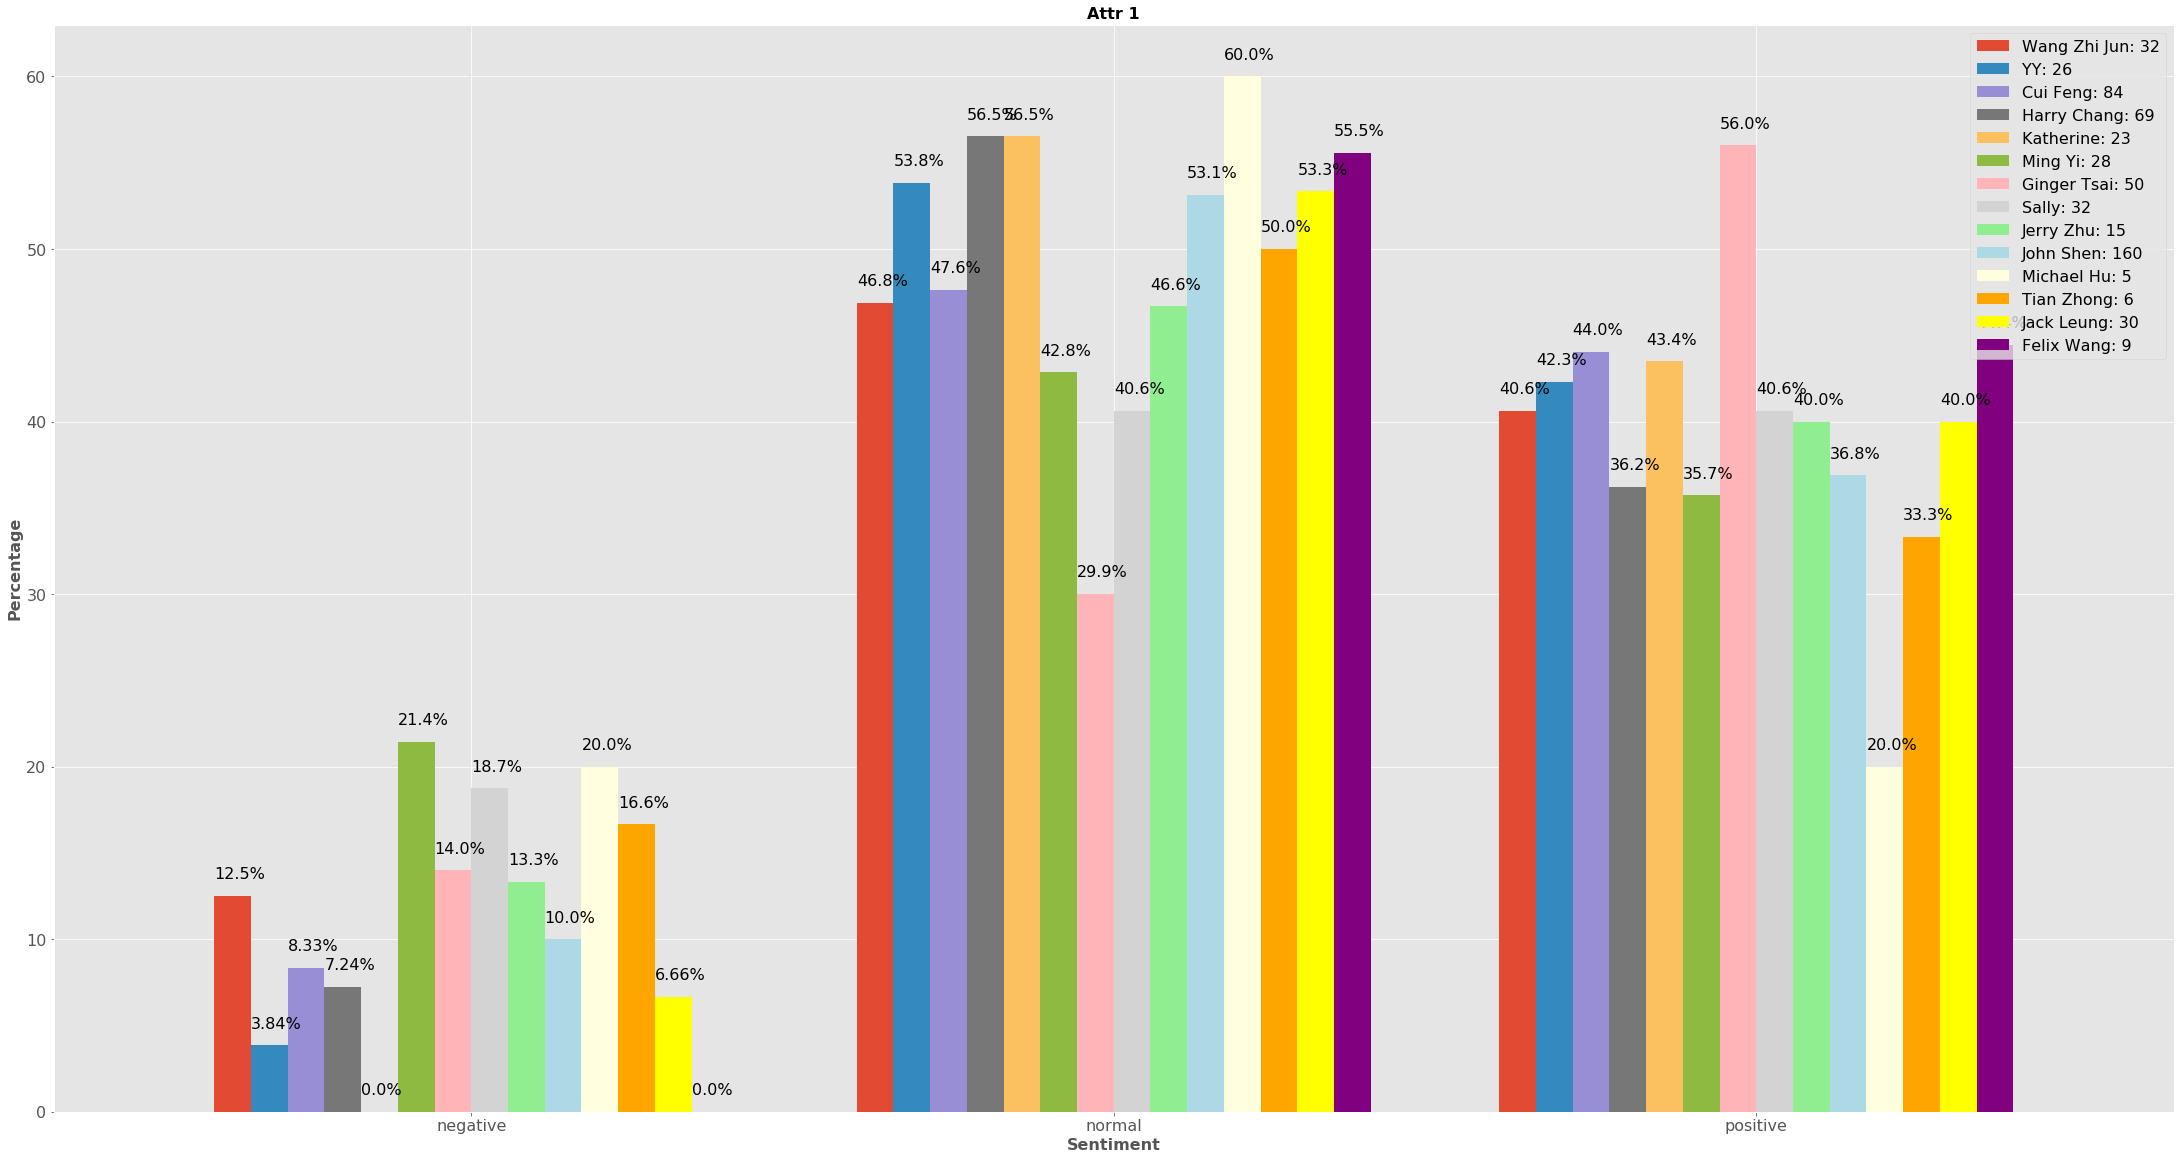

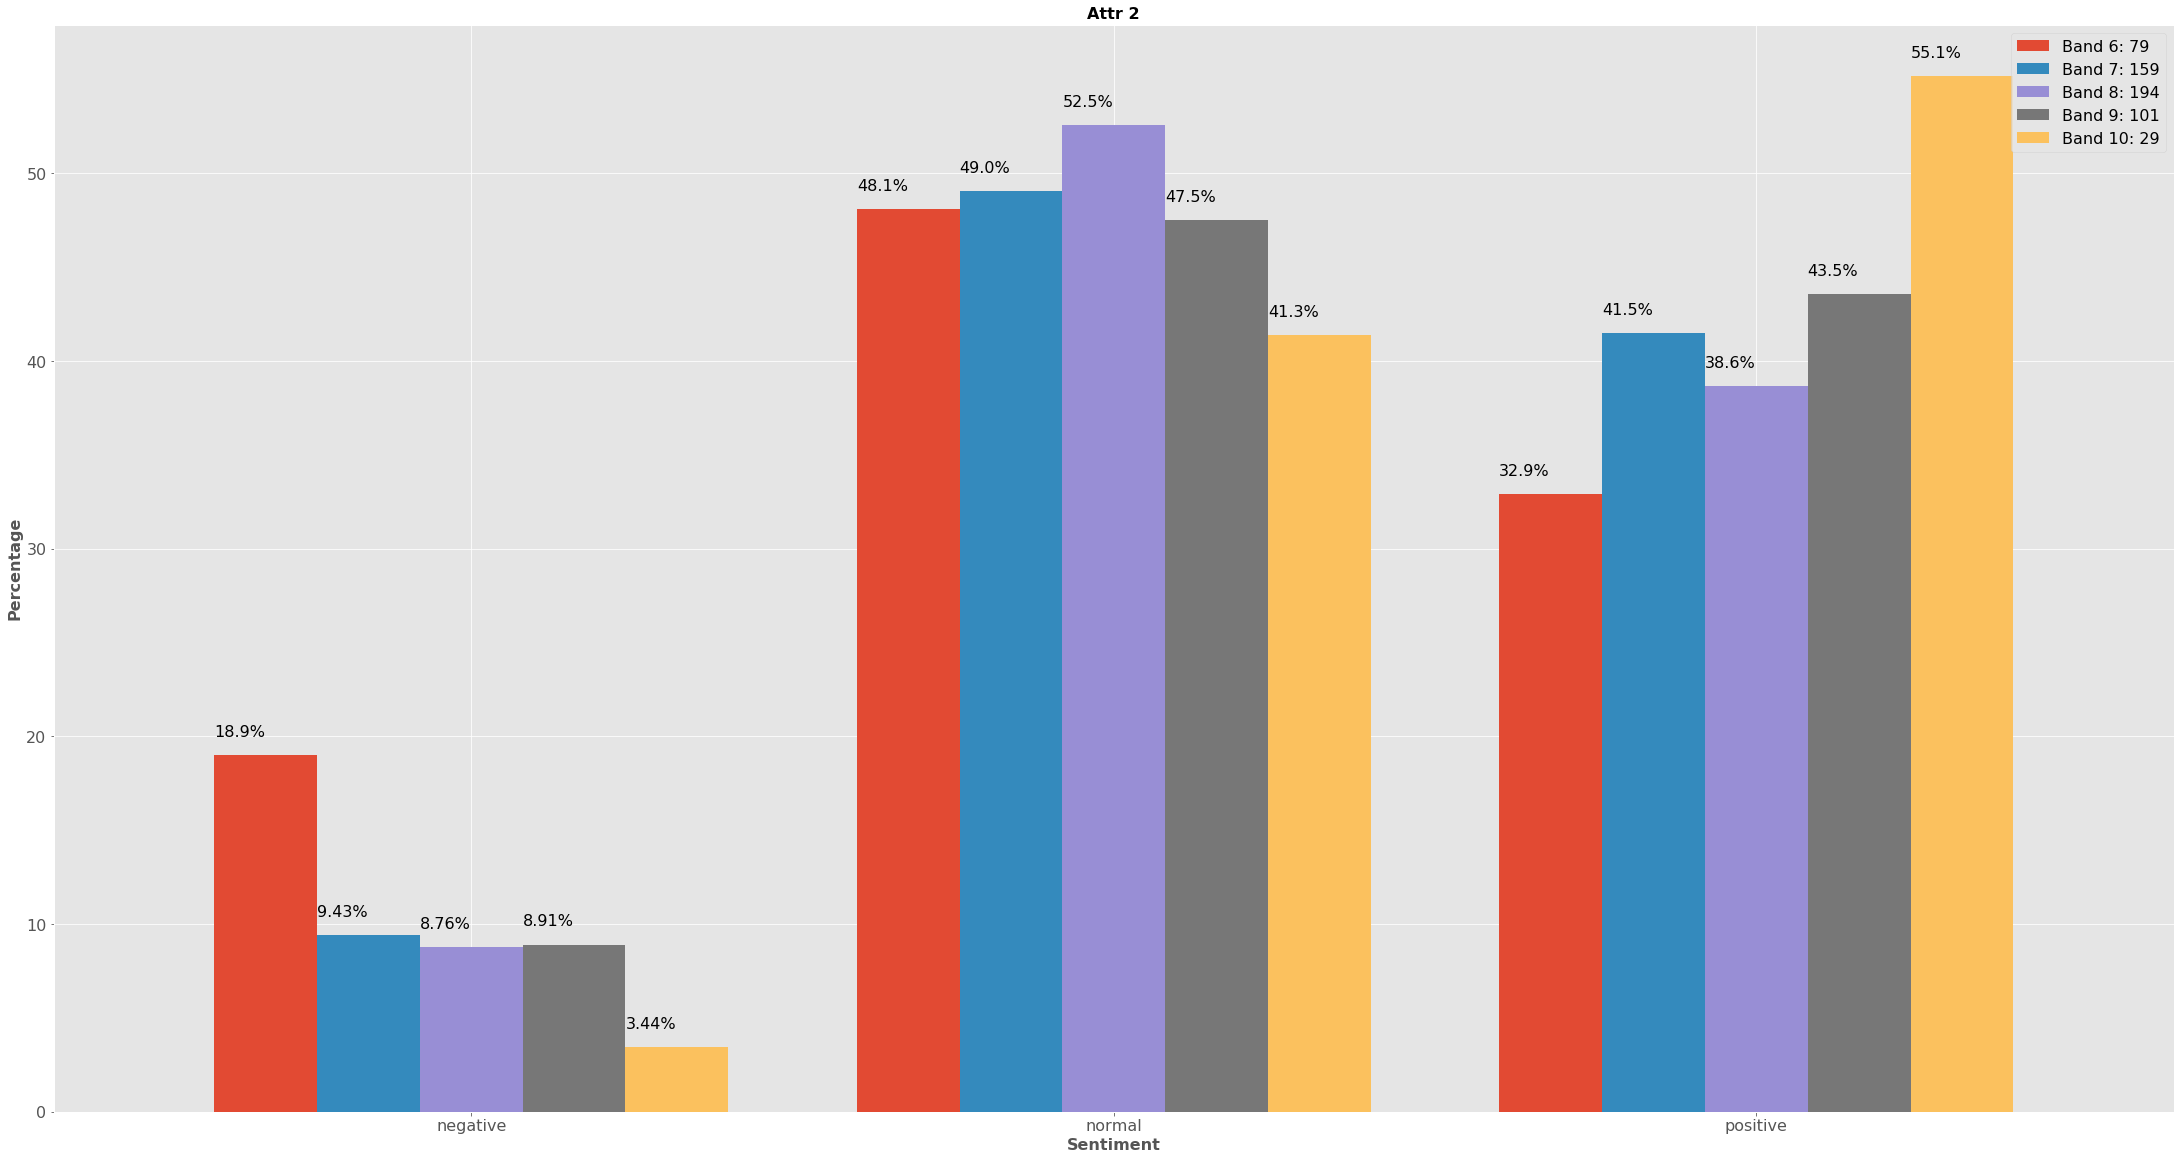

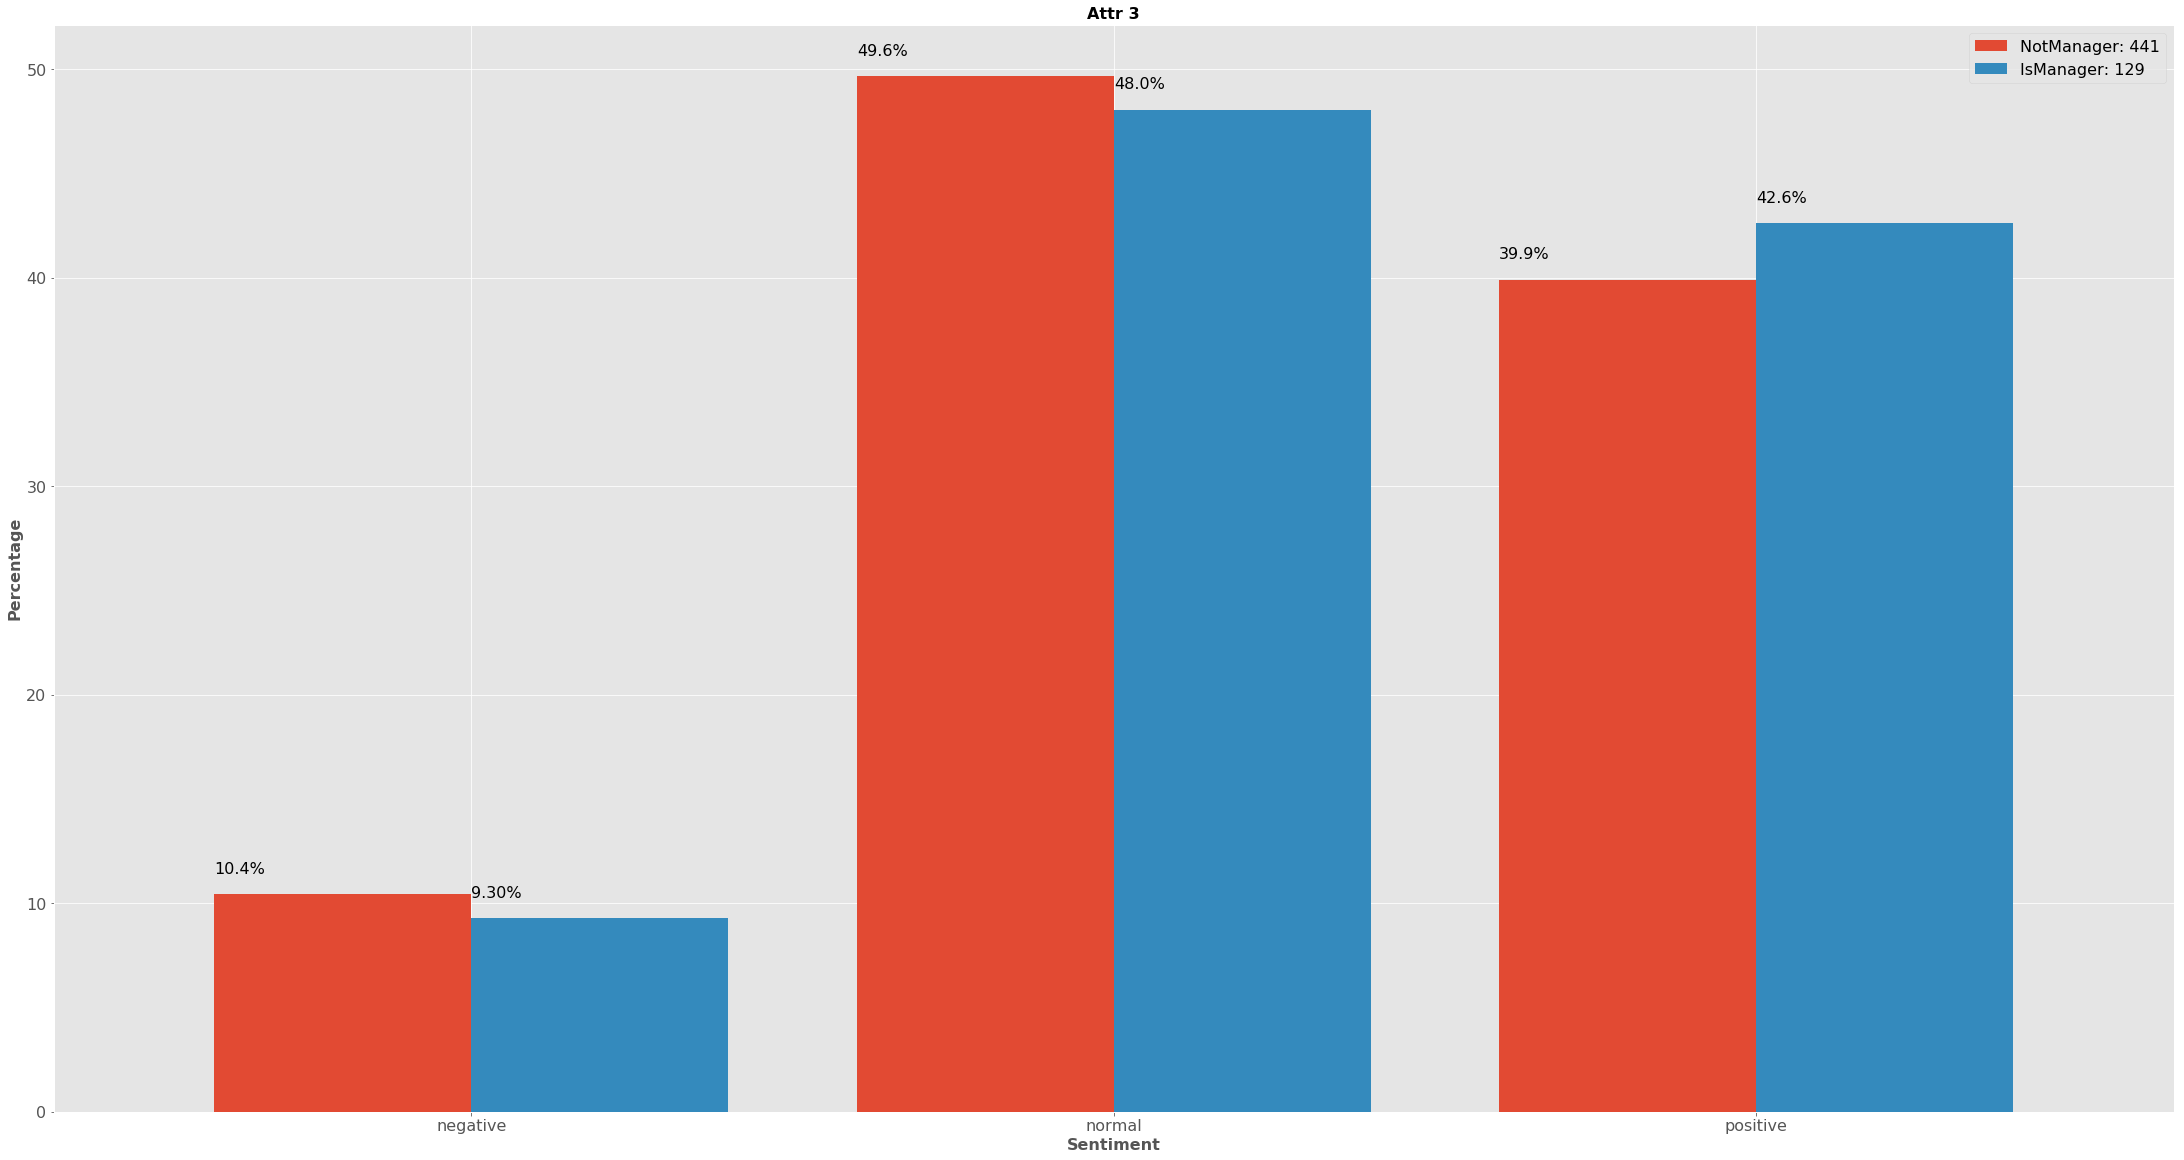

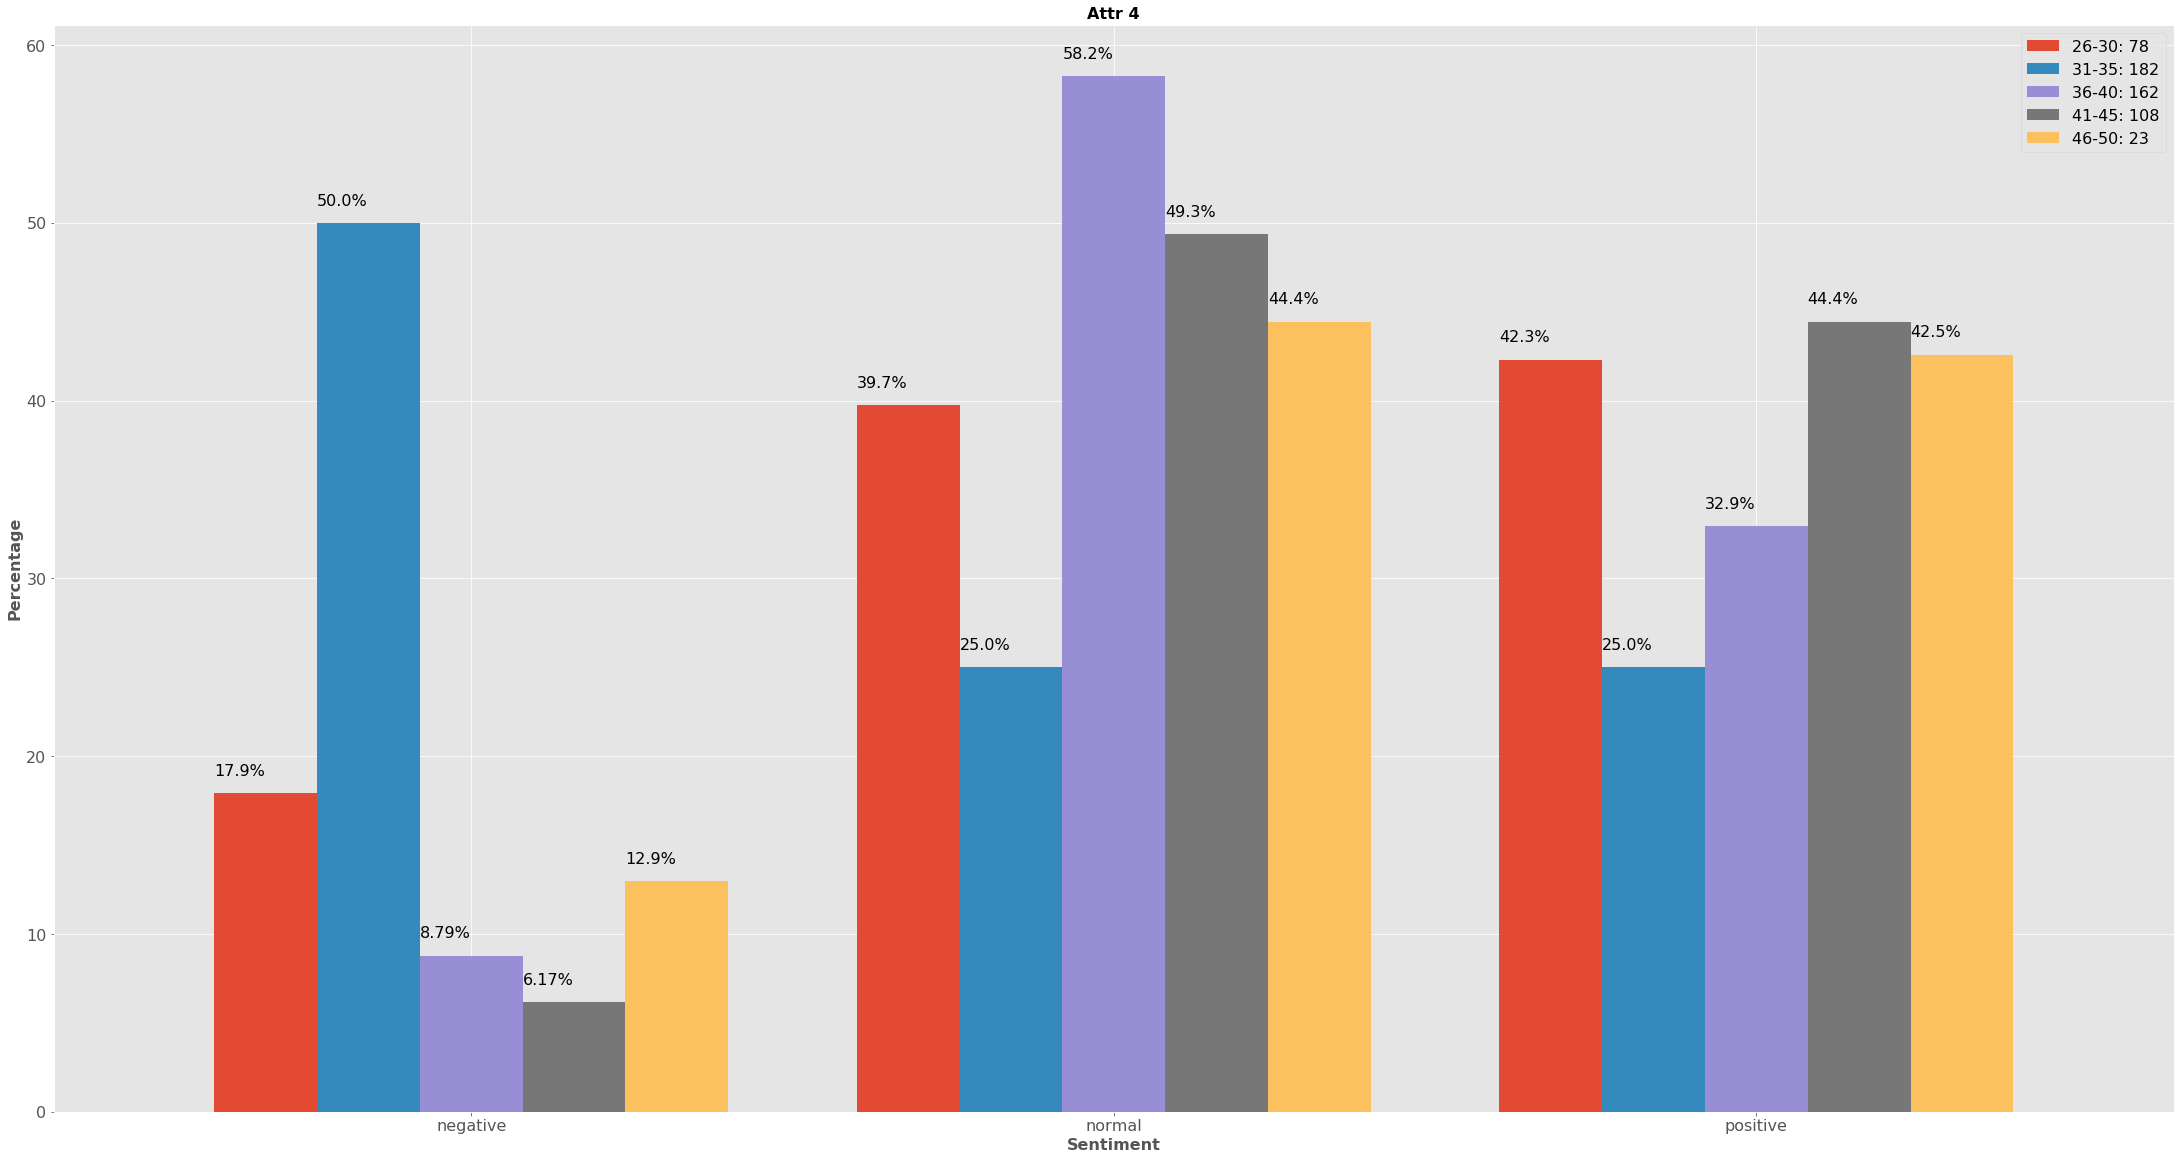

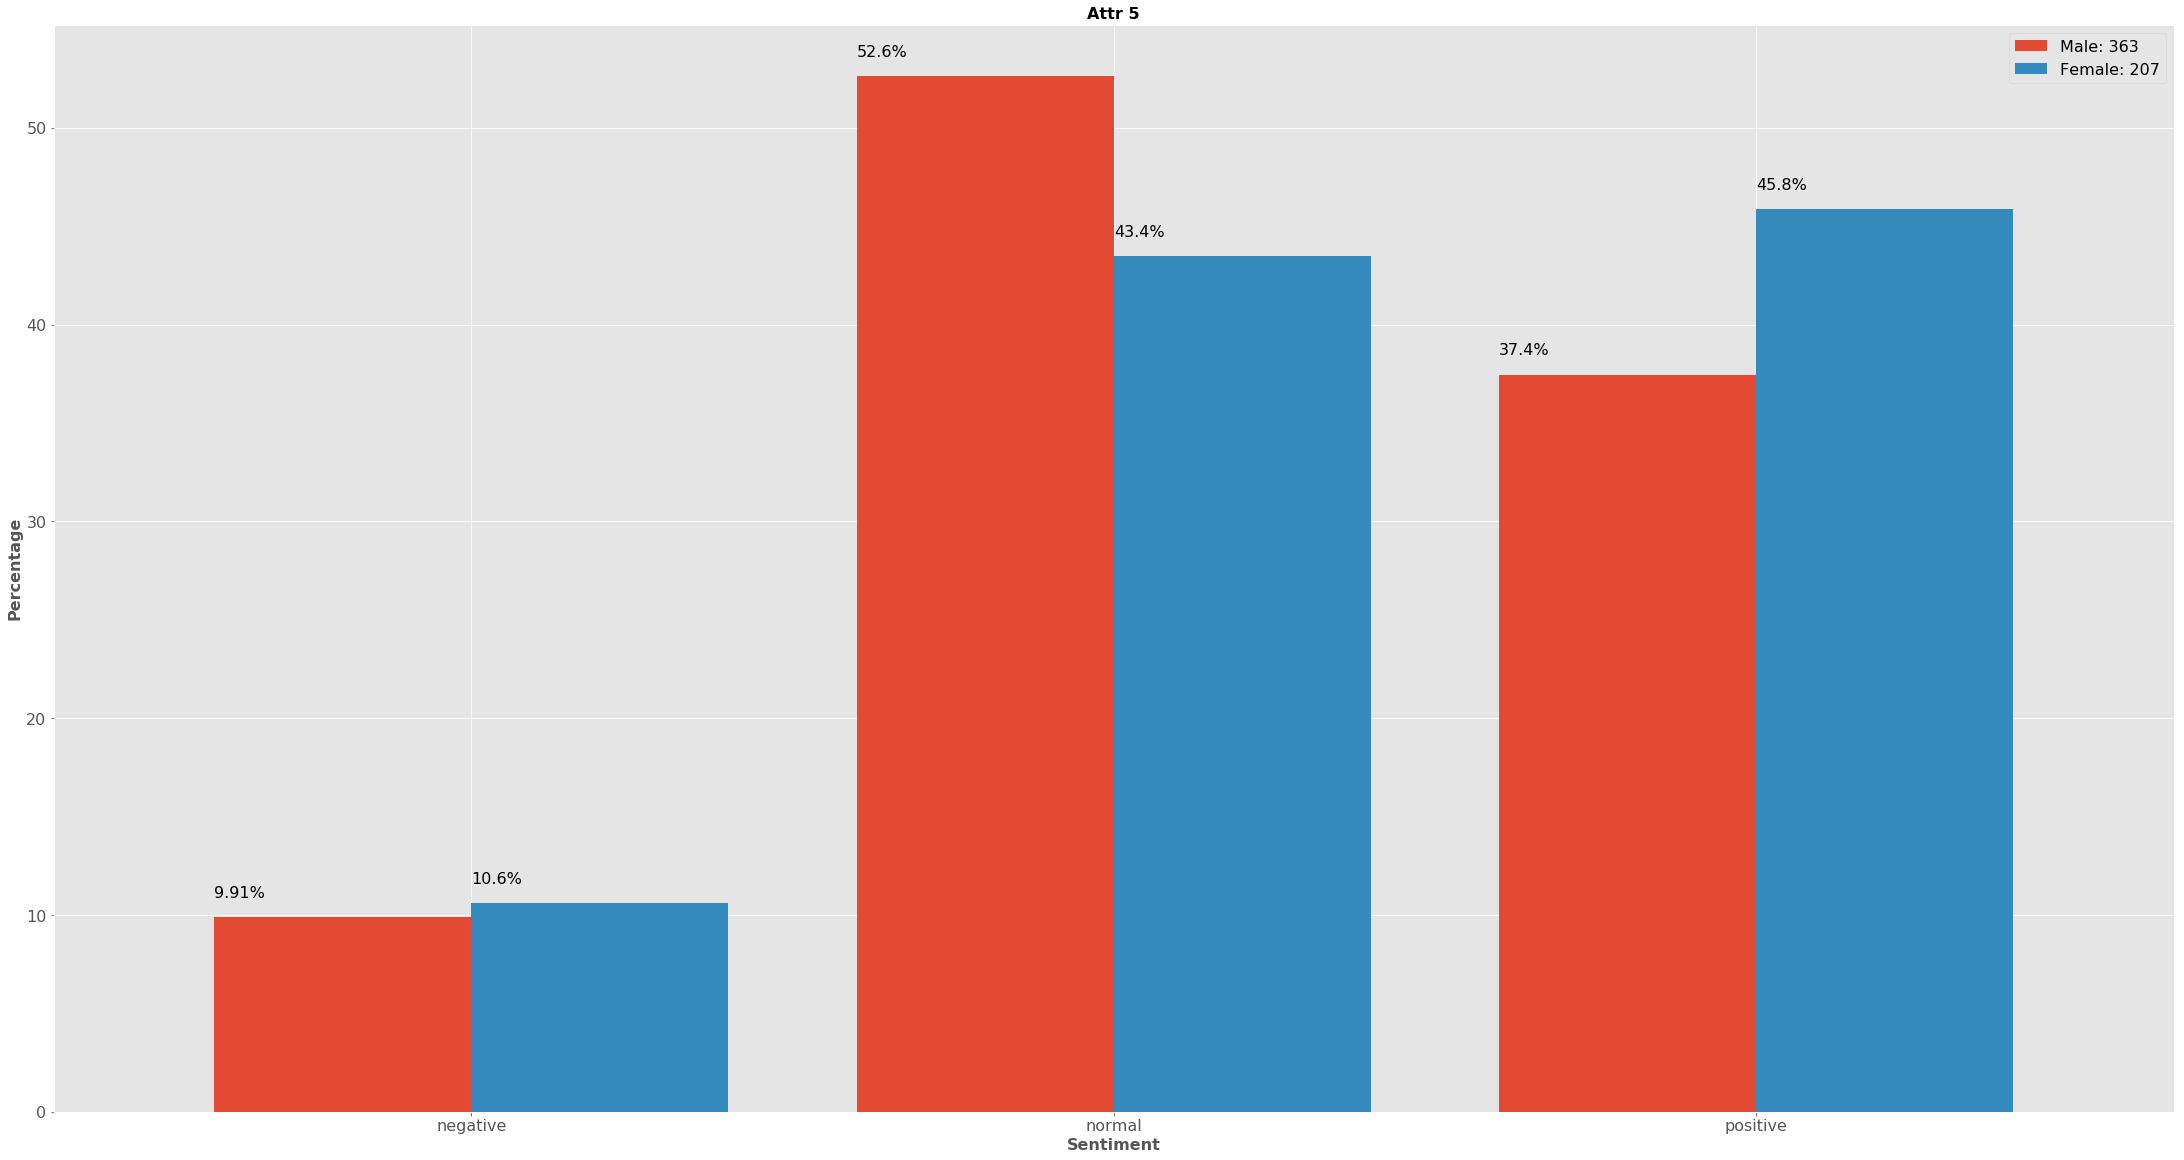

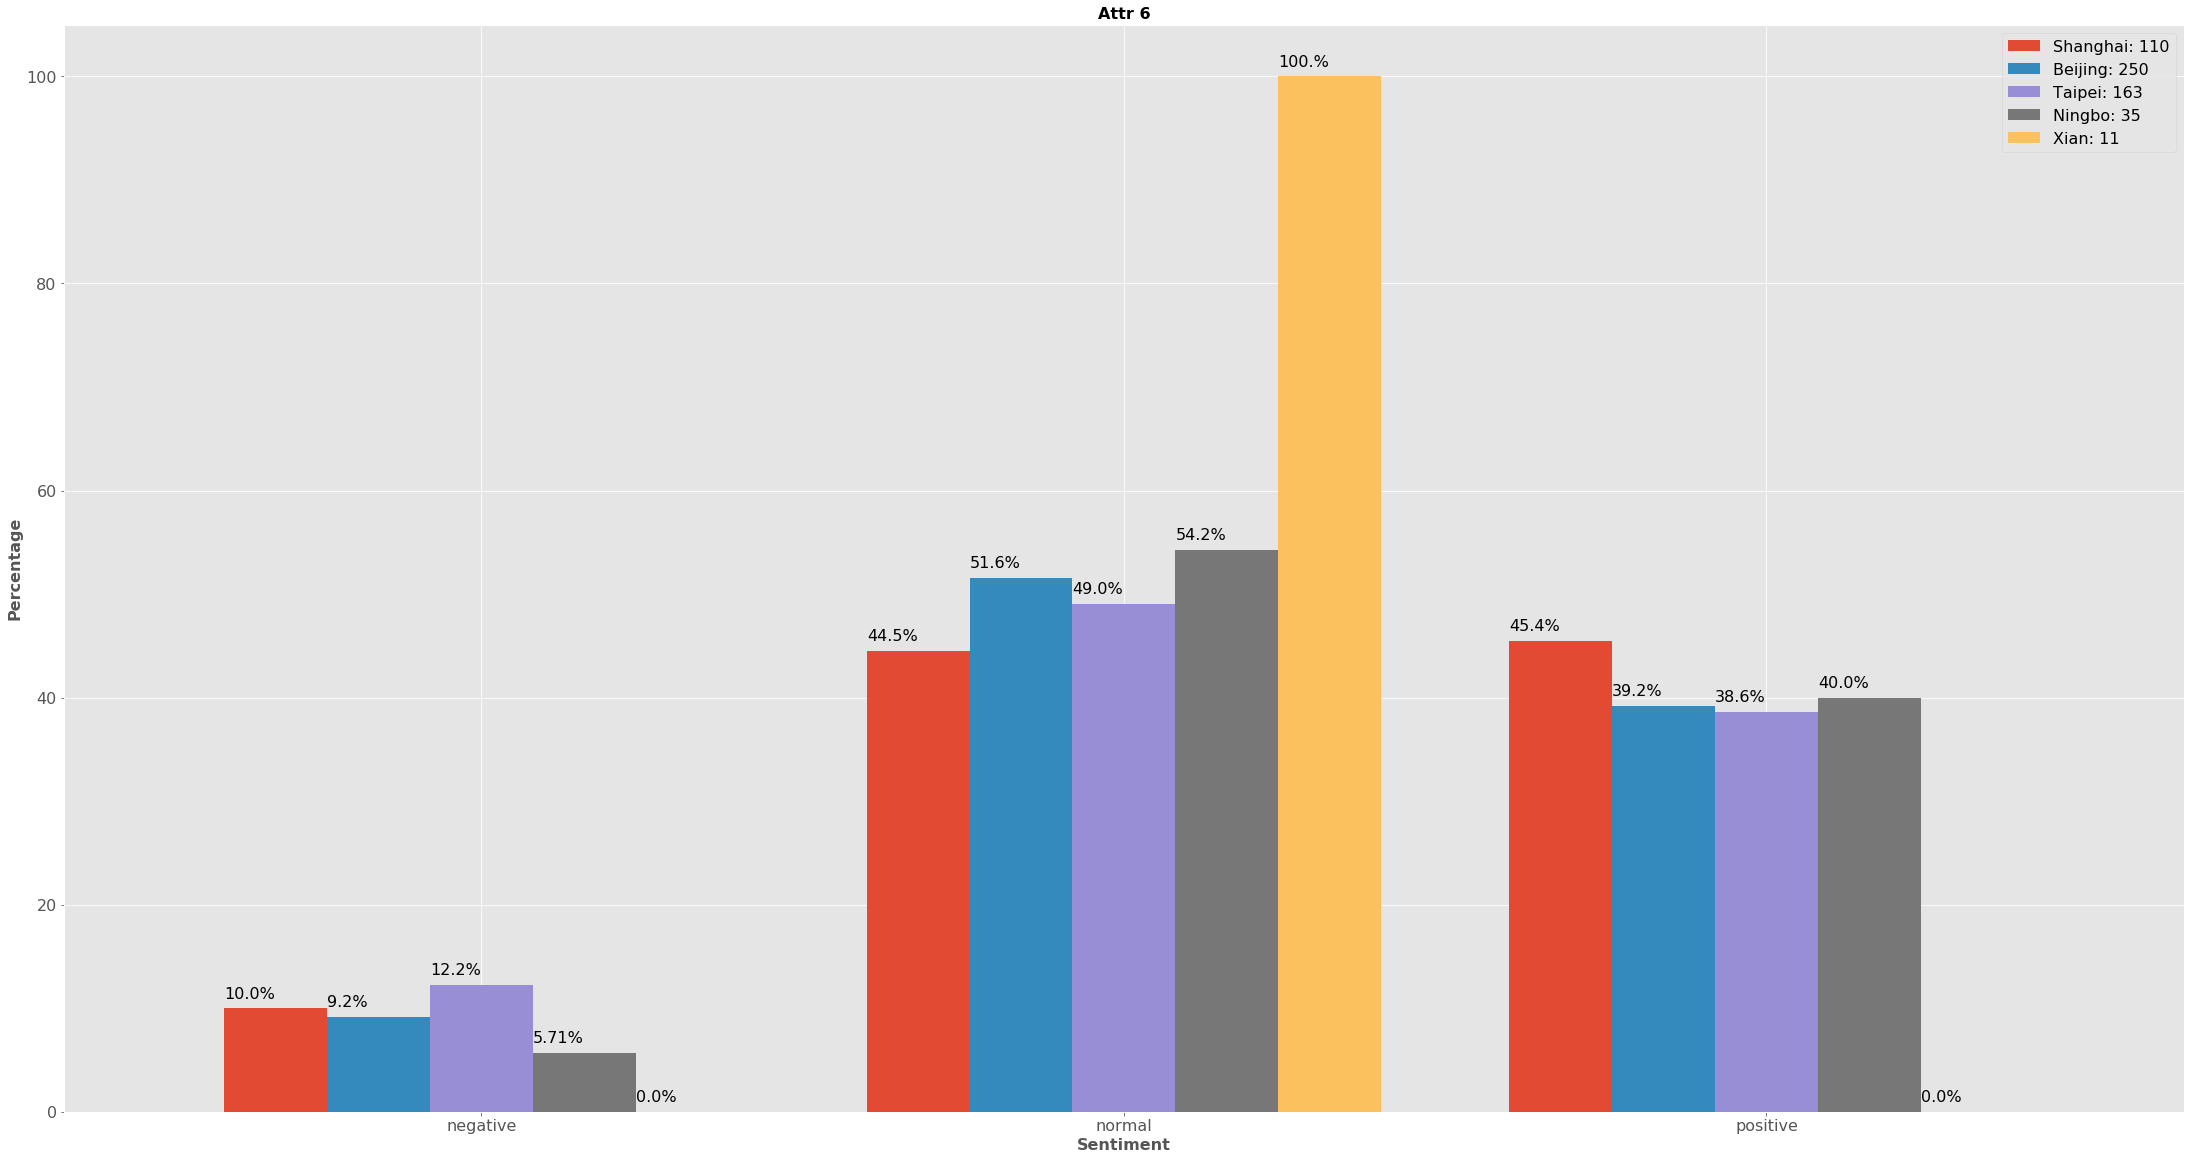

In [219]:
pltAttrSenti(jamStData, 'Attr 1', attr1)
pltAttrSenti(jamStData, 'Attr 2', attr2)
pltAttrSenti(jamStData, 'Attr 3', attr3)
pltAttrSenti(jamStData, 'Attr 4', attr4)
pltAttrSenti(jamStData, 'Attr 5', attr5)
pltAttrSenti(jamStData, 'Attr 6', attr6)

In [220]:
#jamStPsn1 = pd.DataFrame(columns = psnAnsSum)
#jamStTpc1['sentiment'] = ['positive', 'negative']
#for t in psnAnsSum:
#    pos = float(jamStPsn.loc[jamStPsn['Position Title'] == t.split(':')[0], 'posPct'])
#    neg = float(jamStPsn.loc[jamStPsn['Position Title'] == t.split(':')[0], 'negPct'])
#    jamStPsn1[t] = [pos, neg]
#jamStPsn1

In [221]:
#tpc = []
#for i in range(14):
#    tpc.append(str(list(QuesCluster.loc[QuesCluster['cluster'] == i, 'topic'])[0]))

In [222]:
#rcParams['figure.figsize'] = 15,12
#f, ax = plt.subplots(1,1)
#colors = plt.rcParams['axes.color_cycle'] + \
#['lightgrey', 'lightgreen', 'lightblue', 'lightyellow']
#jamStPsn1.plot(kind = 'bar', color = colors, ax = ax, label = tpc)
#ax.set_xlabel('Sentiment')
#ax.set_ylabel('Percentage')
#ax.set_xticklabels(['positive', 'negative'], rotation = 0)
#ax.legend(loc = 'upper right')

In [223]:
#jamPosTpc = jamPosData.groupby('topic')['AnsSimText'].count().rename('AnsCount').reset_index()
#jamNegTpc = jamNegData.groupby('topic')['AnsSimText'].count().rename('AnsCount').reset_index()

In [224]:
#jamPosTpc = jamPosTpc.merge(jamCluster[['topic', 'AnswerSum']])
#jamNegTpc = jamNegTpc.merge(jamCluster[['topic', 'AnswerSum']])
#jamPosTpc['posPct'] = jamPosTpc['AnsCount']/jamPosTpc['AnswerSum']
#jamNegTpc['negPct'] = jamNegTpc['AnsCount']/jamNegTpc['AnswerSum']
#jamStTpc = jamNegTpc[['topic', 'negPct']].merge(jamPosTpc[['topic', 'posPct', 'AnswerSum']], on = 'topic', how = 'outer')
#jamStTpc = jamStTpc.fillna(0)

In [225]:
#tpcAnsSum = []
#for t in tpc:
#    ansSum = int(jamStTpc.loc[jamStTpc['topic'] == t, 'AnswerSum'])
#    tpcAnsSum.append(t + ': ' + str(ansSum))

In [226]:
#jamStTpc1 = pd.DataFrame(columns = tpcAnsSum)
#jamStTpc1['sentiment'] = ['positive', 'negative']
#for t in tpcAnsSum:
#    pos = float(jamStTpc.loc[jamStTpc['topic'] == t.split(':')[0], 'posPct'])
#    neg = float(jamStTpc.loc[jamStTpc['topic'] == t.split(':')[0], 'negPct'])
#    jamStTpc1[t] = [pos, neg]
#jamStTpc1

In [227]:
#rcParams['figure.figsize'] = 15,12
#f, ax = plt.subplots(1,1)
#colors = plt.rcParams['axes.color_cycle'] + \
#['lightgrey', 'lightgreen', 'lightblue', 'lightyellow', 'orange', 'yellow', 'purple']
#jamStTpc1.plot(kind = 'bar', color = colors, ax = ax, label = tpc)
#ax.set_xlabel('Sentiment')
#ax.set_ylabel('Percentage')
#ax.set_xticklabels(['positive', 'negative'], rotation = 0)
#ax.legend(loc = 'upper right')

<font size=4> 2. Get the count of positive & negative answers of each question and get the corresponding positve & negative words (accompanied with the degree words, deny words, noun words)

In [228]:
jamPosQues = jamPosData.groupby('QuesSimText')['AnsSimText'].count().rename('posCnt').reset_index()
jamPosQues = jamPosQues.sort_values('posCnt', ascending = False)
jamPosQues.head()

,QuesSimText,posCnt
5,Do you like our new Agile Open Office?,24
1,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,21
47,工程师的日常生活里，你觉得甚么最需要去改变？(e.g. 工作态度，社交活动，生活习惯，创新思...,21
8,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,17
54,说到工程师文化，你想到的前三个词是什么？例如： 自由，效率，平等，尊重，信任，创新，简化流程...,14


In [229]:
jamNegQues = jamNegData.groupby('QuesSimText')['AnsSimText'].count().rename('negCnt').reset_index()
jamNegQues = jamNegQues.sort_values('negCnt', ascending = False)
jamNegQues.head()

,QuesSimText,negCnt
0,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,13
10,你最不能忍受的功能是？ （登录慢， 表单填好不能submit，单选框不能点文字选中，etc.）,4
16,你觉得这次使用API来回答问题的活动怎么样? 有culture transformation...,3
5,What u like the most about the work and what y...,3
13,你觉得IBM是技术导向的么？,3


In [230]:
jamPosQues = jamPosQues.merge(jamNegQues, on = 'QuesSimText', how = 'outer')
jamQuesSum = jamData.groupby('QuesSimText')['AnsSimText'].count().rename('AnsSum').reset_index()
jamQuesSum = jamQuesSum.merge(jamPosQues, on = 'QuesSimText', how = 'outer' )
jamQuesSum['posPct'] = jamQuesSum['posCnt']/jamQuesSum['AnsSum']
jamQuesSum['negPct'] = jamQuesSum['negCnt']/jamQuesSum['AnsSum']
jamQuesSum = jamQuesSum.sort_values('AnsSum', ascending = False)
jamQuesSum.head()

,QuesSimText,AnsSum,posCnt,negCnt,posPct,negPct
3,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,51,21.0,13.0,0.411765,0.254902
7,Do you like our new Agile Open Office?,40,24.0,2.0,0.600000,0.050000
65,工程师的日常生活里，你觉得甚么最需要去改变？(e.g. 工作态度，社交活动，生活习惯，创新思...,38,21.0,2.0,0.552632,0.052632
81,除了项目以外， 你一周学习新技术的时间有多少？比如：一周1个小时，一周4个小时，一周10个小...,30,3.0,2.0,0.100000,0.066667
5,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？",26,8.0,2.0,0.307692,0.076923


In [231]:
def procSentiWord(dataset):
    posword = []
    negword = []
    for i in range(len(dataset)):
        pos = dataset.loc[i,'posword']
        neg = dataset.loc[i,'negword']
        if not pd.isnull(pos):
            poswd = pos.replace('[', '').replace(']', '').replace("'", '').split(',')
            for k in poswd:
                k = k.replace(' ', '')
                if len(k) > 0:
                    posword.append(k)
        if not pd.isnull(neg):
            negwd = neg.replace('[', '').replace(']', '').replace("'", '').split(',')
            for k in negwd:
                k = k.replace(' ', '')
                if len(k) > 0:
                    negword.append(k)
    return posword, negword

In [232]:
quesList = list(pd.unique(jamData['QuesSimText']))
posword = []
negword = []
poswords = []
negwords = []
jamQuesSt = pd.DataFrame(columns = ['QuesSimText', 'positive_words', 'negative_words'])
for ques in quesList:
    poswdsList = jamDataAns.loc[jamDataAns['QuesSimText'] == ques, 'posword']
    negwdsList = jamDataAns.loc[jamDataAns['QuesSimText'] == ques, 'negword']
    posword = []
    negword = []
    for pos in poswdsList:
        if not pd.isnull(pos):
            poswd = pos.replace('[', '').replace(']', '').replace("'", '').split(',')
            for k in poswd:
                k = k.replace(' ', '')
                if len(k) > 0:
                    posword.append(k)
    for neg in negwdsList:
        if not pd.isnull(neg):
            negwd = neg.replace('[', '').replace(']', '').replace("'", '').split(',')
            for k in negwd:
                k = k.replace(' ', '')
                if len(k) > 0:
                    negword.append(k)
    poswords.append(sorted(Counter(posword).items(), key=itemgetter(1), reverse = True))
    negwords.append(sorted(Counter(negword).items(), key=itemgetter(1), reverse = True))
jamQuesSt = pd.DataFrame({'QuesSimText': quesList,
                         'positive_words': poswords,
                         'negative_words': negwords})

In [233]:
jamQuesSt = jamQuesSt.merge(jamQuesSum, on = 'QuesSimText', how = 'outer').fillna(0)
jamQuesSt = jamQuesSt.sort_values('AnsSum', ascending = False).reset_index(drop = True)
jamQuesSt = pd.concat([jamQuesSt[0:2], jamQuesSt[3:]], axis = 0).reset_index()
jamQuesSt[['QuesSimText', 'negative_words', 'positive_words', 'AnsSum', 'posPct', 'negPct']].head(10)

,QuesSimText,negative_words,positive_words,AnsSum,posPct,negPct
0,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,"[(影响, 4), (影响+同事, 3), (打扰, 2), (吵闹+孩子, 2), (不是...","[(家长+不+愿意+孩子, 2), (公司+不+同意, 2), (国会+允许, 2), (地...",51,0.411765,0.254902
1,Do you like our new Agile Open Office?,[],"[(喜欢, 2)]",40,0.600000,0.050000
2,除了项目以外， 你一周学习新技术的时间有多少？比如：一周1个小时，一周4个小时，一周10个小...,"[(家庭+分心+生娃, 1), (很+后悔+生娃, 1)]","[(一点+时间+集中, 1), (关注+技术, 1)]",30,0.100000,0.066667
3,"Dear IBMer, 你觉得你能够做些什么来让IBM重新在业界走上巅峰？","[(最+缺少+数据, 1), (劣势, 1), (产品+繁杂, 1)]","[(不+乐观, 1), (很+重要+方向, 1), (更+优势, 1), (重视+企业+核心...",26,0.307692,0.076923
4,IBM要转型成功，你认为是技术更重要，还是满足客户需求更重要？,"[(客户+不好, 1), (盈利+影响, 1), (一点+不可, 1), (一点+不可+忽视...","[(重要, 6), (满足+客户, 4), (技术+吸引+客户, 2), (技术+满足+客户...",25,0.680000,0.000000
5,你希望工作环境发生的一个小改变是什么？,[],"[(更+希望+速溶+咖啡, 1), (更+健康, 1), (明亮, 1), (大家+更+愿意...",22,0.409091,0.000000
6,说到工程师文化，你想到的前三个词是什么？例如： 自由，效率，平等，尊重，信任，创新，简化流程...,[],"[(信任, 3), (自由, 2), (平等, 2), (效率, 2), (高效, 2), ...",16,0.875000,0.000000
7,你最喜欢的Whitewater工具是什么？,[],"[(人工智能+最好+方向, 1), (人工智能+了解+算法, 1)]",16,0.125000,0.000000
8,你觉得IBM是技术导向的么？,"[(代码+封闭, 1)]","[(业界+不怎么+认同, 1)]",14,0.071429,0.214286
9,如何才能在Lab工作的每一天都有好心情,"[(人+少+负面+信息, 1), (少+负面+信息, 1)]","[(快乐, 1), (心态+平和, 1), (心情+一定+目标, 1), (提升, 1), ...",12,0.916667,0.000000


In [234]:
a = jamQuesSt.loc[jamQuesSt['negPct'] > 0.2 ].reset_index(drop = True)
b = a[['QuesSimText', 'negative_words', 'positive_words', 'AnsSum', 'posPct', 'negPct']]
b = b.merge(QuesCluster[['QuesSimText', 'topic']].drop_duplicates(), on = 'QuesSimText')
b

,QuesSimText,negative_words,positive_words,AnsSum,posPct,negPct,topic
0,CDL办公室管理的挑战：工作日有小朋友跟着家长来上班。一方面，学校放假期间小朋友不能自己呆在...,"[(影响, 4), (影响+同事, 3), (打扰, 2), (吵闹+孩子, 2), (不是...","[(家长+不+愿意+孩子, 2), (公司+不+同意, 2), (国会+允许, 2), (地...",51,0.411765,0.254902,company management
1,你觉得IBM是技术导向的么？,"[(代码+封闭, 1)]","[(业界+不怎么+认同, 1)]",14,0.071429,0.214286,IBM
2,Do you like this Jam?,[],"[(更+友善, 1), (更好, 1), (进步+空间, 1)]",9,0.777778,0.222222,jam/api/openwhisk
3,你觉得这次使用API来回答问题的活动怎么样? 有culture transformation...,"[(有点+麻烦, 1), (不好, 1), (失去+焦点, 1), (文化+冲击+制式, 1)]","[(大家+熟悉+技术, 1), (还+不错, 1), (大家+熟悉+玩玩, 1), (有趣,...",9,0.444444,0.333333,jam/api/openwhisk
4,"David Kenny在上午的TownHall上说""Powerpoint is neithe...","[(公司+不能+问题, 1), (代码+少, 1)]","[(不+同意, 1)]",7,0.142857,0.428571,others
5,What u like the most about the work and what y...,"[(不合理+制度, 1), (不合理+无可奈何, 1)]",[],6,0.500000,0.500000,work
6,你最不能忍受的功能是？ （登录慢， 表单填好不能submit，单选框不能点文字选中，etc.）,"[(不能, 2), (慢, 1), (速度慢, 1), (延迟, 1)]",[],6,0.166667,0.666667,others
7,你觉得 IBM 最需要改变的文化是什么?,"[(少, 1), (财务+不要+财务, 1), (用户+不要, 1)]","[(激励, 1), (帮助, 1)]",5,0.200000,0.400000,IBM
8,你是否有过开会厌烦症？让你厌烦开会的原因有哪些？,"[(厌烦, 1), (过于+频繁, 1), (时间+不能, 1)]","[(希望, 1), (不+明确+会议, 1), (很+没有+效率, 1), (时间+不能+按...",4,0.000000,0.750000,others
9,请问你使用API批量回答问题，有成功吗？,"[(失败, 2), (多+少, 1)]",[],4,0.000000,0.500000,jam/api/openwhisk


In [235]:
#posPosWords, posNegWords = procSentiWord(jamPosData)
#negPosWords, negNegWords = procSentiWord(jamNegData)

In [236]:
#sorted(Counter(posPosWords).items(), key=itemgetter(1), reverse = True)

In [237]:
#sorted(Counter(posNegWords).items(), key=itemgetter(1), reverse = True)

In [238]:
#sorted(Counter(negPosWords).items(), key=itemgetter(1), reverse = True)

In [239]:
#sorted(Counter(negNegWords).items(), key=itemgetter(1), reverse = True)

<font size=4>2. Plot the density of positive percentage among different position title of peopl & topic of questions

In [240]:
jamStData.loc[jamStData['Position Title'].map(lambda x: x not in psnTitleSet), 'Position Title'] = 'Others'

In [241]:
jamPsnSt = jamStData.groupby('Position Title')['positive_percentage'].describe().reset_index()
jamPsnSt

,Position Title,count,mean,std,min,25%,50%,75%,max
0,Customer / Partner Engagement,9.0,0.743056,0.250867,0.500,0.500,0.687500,1.000000,1.0
1,Functional Manager,7.0,0.603678,0.202680,0.375,0.500,0.525000,0.662872,1.0
2,Infrastructure Architect,7.0,0.678964,0.232092,0.500,0.500,0.538462,0.857143,1.0
3,Others,47.0,0.564000,0.300135,0.000,0.500,0.500000,0.750000,1.0
4,Project Manager,7.0,0.588095,0.186764,0.500,0.500,0.500000,0.558333,1.0
5,Software Architect,39.0,0.591331,0.249052,0.000,0.500,0.500000,0.728864,1.0
6,Software Designer,8.0,0.780208,0.239623,0.500,0.575,0.820833,1.000000,1.0
7,Software Developer,143.0,0.603662,0.276098,0.000,0.500,0.500000,1.000000,1.0
8,Software Release Manager,82.0,0.637774,0.243141,0.000,0.500,0.500000,0.968750,1.0
9,Software Test Specialist,179.0,0.635098,0.278871,0.000,0.500,0.500000,1.000000,1.0


In [242]:
psnLen = int(max(jamPsnSt['count']))
jamPsnStData = pd.DataFrame({}, columns = psnSet)
for psn in psnSet:
    jamPsnStData[psn] = [np.nan] * psnLen
    posScore = jamStData.loc[jamStData['Position Title'] == psn, 'positive_percentage']
    print(psn + ': ' + str(len(posScore)))
    jamPsnStData[psn] = posScore

NameError: name 'psnSet' is not defined

In [ ]:
#jamStData.to_csv('Question_Answer_PositivePct.csv', index = False, encoding='utf_8_sig')

In [ ]:
psnSet = list(pd.unique(jamStData['Position Title']))

In [ ]:
i = 0
for psn in psnSet:
    jamStData.loc[jamStData['Position Title'] == psn, 'index'] = i
    i += 1

In [ ]:
rcParams['figure.figsize'] = 20,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle'] + [ 'purple', 'green', 'blue', 'yellow', 'orange']
for i in range(11):
    posScore = jamStData.loc[jamStData['index'] == i,'positive_percentage']
    ax.scatter([i]*len(posScore), posScore, color = colors[i])
x = np.linspace(0,10,1000)
xLen = len(x)
ax.plot(x, [0.5] * xLen, 'lightgrey')
ax.set_title('Positive score density of different positile title')
ax.set_xlabel('position title')
ax.set_ylabel('positive score')
ax.set_xticks(np.arange(11))
ax.set_xticklabels(psnSet, rotation = 45)
plt.show()

In [ ]:
jamStCnt = jamStData.groupby('Position Title')['AnsSimText'].count().rename('AnsCnt').reset_index()
psnCnt = []
for p in psnSet:
    cnt = int(jamStCnt.loc[jamStCnt['Position Title'] == p, 'AnsCnt'])
    psnCnt.append(p + ': ' + str(cnt))

In [ ]:
rcParams['figure.figsize'] = 20,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle'] + ['blue', 'lightgreen', 'lightblue', 'yellow', 'purple']
for i in range(len(psnCnt)):
    psn = psnCnt[i].split(':')[0]
    posScore = list(jamStData.loc[jamStData['Position Title'] == psn,'positive_percentage'])
    xs = pd.DataFrame(posScore)
    xs.plot(kind = 'density', c = colors[i], ax = ax, xlim = [0,1])
ax.set_title('Positive percentage density of different positile title')
ax.set_xlabel('positive percentage')
ax.set_ylabel('density')
ax.legend(labels = psnCnt)
plt.show()

In [ ]:
jamTopicSt = jamStData.groupby('topic')['positive_percentage'].describe().reset_index()
jamTopicSt

In [ ]:
tpc = []
for i in range(14):
    tpc.append(str(list(QuesCluster.loc[QuesCluster['cluster'] == i, 'topic'])[0]))

In [ ]:
rcParams['figure.figsize'] = 20,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle'] + ['purple', 'green', 'blue', 'yellow', 'orange', 'lightgreen', 'lightblue', 'lightyellow']
for i in range(14):
    posScore = jamStData.loc[jamStData['cluster'] == i,'positive_percentage']
    ax.scatter([i]*len(posScore), posScore, color = colors[i])
x = np.linspace(0,10,1000)
xLen = len(x)
ax.plot(x, [0.5] * xLen, 'lightgrey')
ax.set_title('Positive score density of different question topics')
ax.set_xlabel('question topic')
ax.set_ylabel('positive score')
ax.set_xticks(np.arange(14))
ax.set_xticklabels(tpc, rotation = 45)
plt.show()

In [ ]:
tpcAnsSum = []
for t in tpc:
    ansSum = int(jamTopicSt.loc[jamTopicSt['topic'] == t, 'count'])
    tpcAnsSum.append(t + ': ' + str(ansSum))

In [ ]:
rcParams['figure.figsize'] = 20,12
f, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.color_cycle']+ ['purple', 'green', 'blue', 'yellow', 'orange', 'lightgreen', 'lightblue', 'lightyellow']
for i in range(14):
    tpc = tpcAnsSum[i].split(': ')[0]
    posScore = jamStData.loc[jamStData['topic'] == tpc,'positive_percentage']
    xs = pd.DataFrame(posScore)
    xs.plot(kind = 'density', c = colors[i], ax = ax, xlim = [0,1])
ax.set_title('Positive percentage density of different question topics')
ax.set_xlabel('positive percentage')
ax.set_ylabel('density')
ax.legend(labels = tpcAnsSum)
plt.show()

<font size=4>3. Plot the density of positive percentage among different attributes

In [ ]:
jamStCopy = jamStData.copy()
#jamStCopy.loc[jamStCopy['Position Title'].map(lambda x: x in otPsnSet), 'Position Title'] = 'Others'

In [ ]:
def procAttr(Attr, data):
    jamAttr = jamPsn.groupby(Attr)['Position Title'].count().rename('cnt').reset_index()
    otSetAt = set(jamAttr.loc[jamAttr['cnt'] < 10, Attr])
    data = data.dropna()
    data.loc[data[Attr].map(lambda x: x in otSetAt), Attr] = 'Others'
    attrMap = {}
    attrSet = list(set(pd.unique(data[Attr])))
    for i in range(len(attrSet)):
        attrMap[i] = attrSet[i]
    return data, attrMap

In [ ]:
jamStCopy, attrMap1 = procAttr('Attr 1', jamStCopy)
jamStCopy, attrMap2 = procAttr('Attr 2', jamStCopy)
jamStCopy, attrMap3 = procAttr('Attr 3', jamStCopy)
jamStCopy, attrMap4 = procAttr('Attr 4', jamStCopy)
jamStCopy, attrMap5 = procAttr('Attr 5', jamStCopy)
jamStCopy, attrMap6 = procAttr('Attr 6', jamStCopy)
jamStCopy, attrMap7 = procAttr('Attr7', jamStCopy)

In [ ]:
def pltAttrSenti(data, Attr, attrMap):
    cntData = data.groupby(Attr)['AnsSimText'].count().rename('AnsCnt').reset_index()
    rcParams['figure.figsize'] = 20,12
    f, ax = plt.subplots(1,1)
    colors = plt.rcParams['axes.color_cycle'] + ['purple', 'green', 'blue', 'yellow', 'orange', 'lightgreen', 'lightblue']
    attrSet = list(attrMap.keys())
    attrCnt = []
    attrLen = len(attrMap)
    for i in range(attrLen):
        attr = attrMap[attrSet[i]]
        cnt = int(cntData.loc[cntData[Attr] == attr, 'AnsCnt'])
        attrCnt.append(str(attr)+': '+str(cnt))
        posScore = data.loc[data[Attr] == attr,'positive_percentage']
        xs = pd.DataFrame(posScore)
        xs.plot(kind = 'density', c = colors[i], ax = ax, xlim = [0,1])
    ax.set_title('Positive percentage density of ' + Attr)
    ax.set_xlabel('positive percentage')
    ax.set_ylabel('density')
    ax.legend(labels = attrCnt)
    plt.show()

In [ ]:
pltAttrSenti(jamStCopy, 'Attr 1', attrMap1)
pltAttrSenti(jamStCopy, 'Attr 2', attrMap2)
pltAttrSenti(jamStCopy, 'Attr 3', attrMap3)
pltAttrSenti(jamStCopy, 'Attr 4', attrMap4)
pltAttrSenti(jamStCopy, 'Attr 5', attrMap5)
pltAttrSenti(jamStCopy, 'Attr 6', attrMap6)
pltAttrSenti(jamStCopy, 'Attr7', attrMap7)

<font size=4>4. For ppt...

In [ ]:
c = jamStData.loc[(jamStData['topic'] == 'others') & (jamStData['positive_percentage'] < 0.5), [
    'QuesSimText', 'AnsSimText', 'topic', 'positive_percentage']].sort_values(
'positive_percentage').reset_index(drop = True)
c

In [ ]:
d = jamStData.loc[(jamStData['Position Title'] == 'Others') & (jamStData['positive_percentage'] < 0.5), [
    'QuesSimText', 'AnsSimText', 'topic', 'positive_percentage']].sort_values(
'positive_percentage').reset_index(drop = True)
d = d.merge(jamData[['QuesSimText', 'AnsSimText', 'Position Title']], on = ['QuesSimText', 'AnsSimText'], how = 'left' )
d

In [ ]:
jamStData.loc[(jamStData['Position Title'] == 'Customer / Partner Engagement') & (jamStData['positive_percentage'] > 0.5), [
    'QuesSimText', 'AnsSimText', 'Position Title', 'topic', 'positive_percentage']].reset_index(drop = True)

In [ ]:
e = jamStData.loc[(jamStData['Position Title'] == 'Software Designer') & (jamStData['positive_percentage'] > 0.5), [
    'QuesSimText', 'AnsSimText', 'Position Title', 'topic', 'positive_percentage']].reset_index(drop = True)
e

In [ ]:
jamStData.loc[(jamStData['topic'].map(lambda x: x in {'work', 'IBM', 'environment+agile'})) & (jamStData['positive_percentage'] < 0.5)]

In [ ]:
#rcParams['figure.figsize'] = 20,12
#f, ax = plt.subplots(1,1)
#colors = plt.rcParams['axes.color_cycle'] + ['purple', 'green', 'blue', 'yellow', 'orange', 'lightgreen', 'lightgrey',\
#                                             'lightblue', 'lightyellow']
#for i in range(15):
#    posScore = jamStData.loc[jamStData['Attr 1'] == i + 1,'positive_percentage']
#    ax.scatter([i]*len(posScore), posScore, color = colors[i])
#x = np.linspace(0,14,1000)
#xLen = len(x)
#ax.plot(x, [0.5] * xLen, 'lightgrey')
#ax.set_title('Positive score density of Attr 1')
#ax.set_xlabel('Attr 1')
#ax.set_ylabel('positive score')
#ax.set_xticks(np.arange(15))
#ax.set_xticklabels(np.arange(1,16), rotation = 45)
#plt.show()

<font size=4>5. Fof further use...

In [ ]:
chnNounList = [ j for i in jamDataAns['nounwords'].values for j in i ]
engNounList = [ j for i in jamDataAns['n_engwordall'].values for j in i ]
nounList = chnNounList + engNounList
def substList(original, sub_dict):
    result = []
    for i in original:
        if i in sub_dict.keys():
            result.append(sub_dict[i])
        else:
            result.append(i)
    return result
sub_dict = {'孩子':'孩子/小朋友/家长', '小朋友':'孩子/小朋友/家长', '小孩': '孩子/小朋友/家长', '家长':'孩子/小朋友/家长',
            '团队' : '团队/team', 'team' : '团队/team', '办公室' :'办公室/office',
           'office': '办公室/office', '时间': '时间/小时', '小时': '时间/小时',
           '大家': '大家/同事/员工/people', '同事': '大家/同事/员工/people', '员工': '大家/同事/员工/people',
           'people': '大家/同事/员工/people'}

In [ ]:
nounList2 = substList(nounList, sub_dict)
mentionedList = pd.Series(nounList2).value_counts()
mentionedList.shape

In [ ]:
mentionedList.head()

In [ ]:
(mentionedList.cumsum()/mentionedList.sum()).head()

In [ ]:
jamDataAns.columns

In [ ]:
jamChnAns['AnsSnowText'] = jamChnAns['AnswerText'].map(lambda x: SnowNLP(x))
jamChnAns['Sentiment'] = jamChnAns['AnsSnowText'].map(lambda x: x.sentiments)
jamChnAns.head()